***Квадратичная функция*** 

                      Методы сопряженных градиентов
Дано:
Целевая функция:        f(x, y) =  6*x**2 - 4*x*y + 8.94427190999916*x + 3*y**2 + 17.8885438199983*y + 22
X = [ 5.0   5.0 ] 	f =  281.164079
X = [ -1.904982   1.065527 ] 	f =  57.321086
X = [ -2.236069   -4.472129 ] 	f =  -28.0

X = [ 2.0   3.0 ] 	f =  120.554175
X = [ -2.845683   -3.452315 ] 	f =  -20.163321
X = [ -2.236068   -4.472136 ] 	f =  -28.0

X = [ -10.0   5.0 ] 	f =  897.0
X = [ -0.530185   -1.350644 ] 	f =  -2.608241
X = [ -2.236152   -4.472105 ] 	f =  -28.0

X = [ -3.0   3.0 ] 	f =  165.832816
X = [ 0.171407   -0.88865 ] 	f =  10.791116
X = [ -2.236068   -4.472136 ] 	f =  -28.0


**********************************************************************************************************************************************************************
Методы			     МСГ			     Флетчера-Ривса			     Полака-Рибьера
Xmin  		 [-2.23606796 -4.47213591] 		 [-2.23615207 -4.47210527] 	 [-2.23606804 -4.472136  ]
f(Xmin)		 -28.0 			 -2

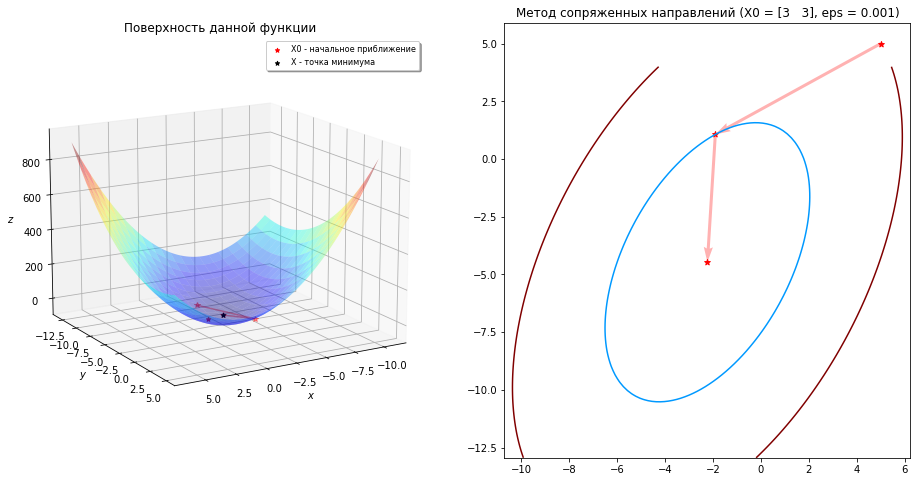

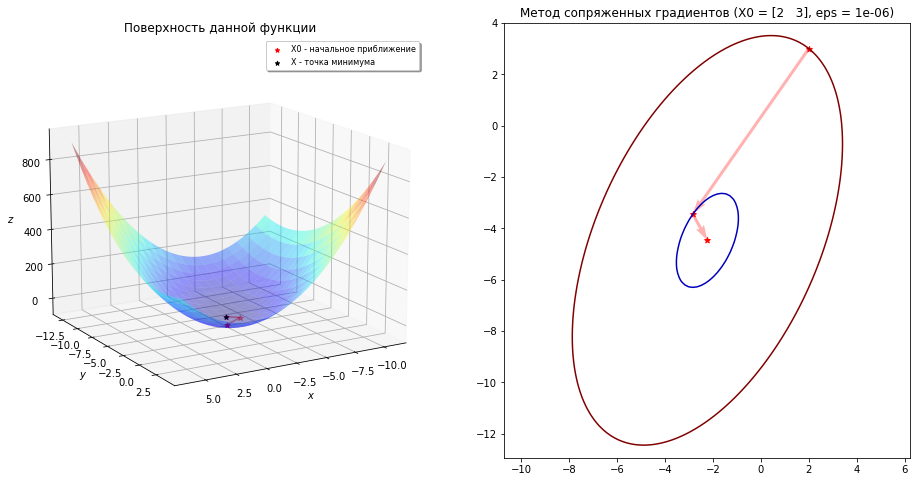

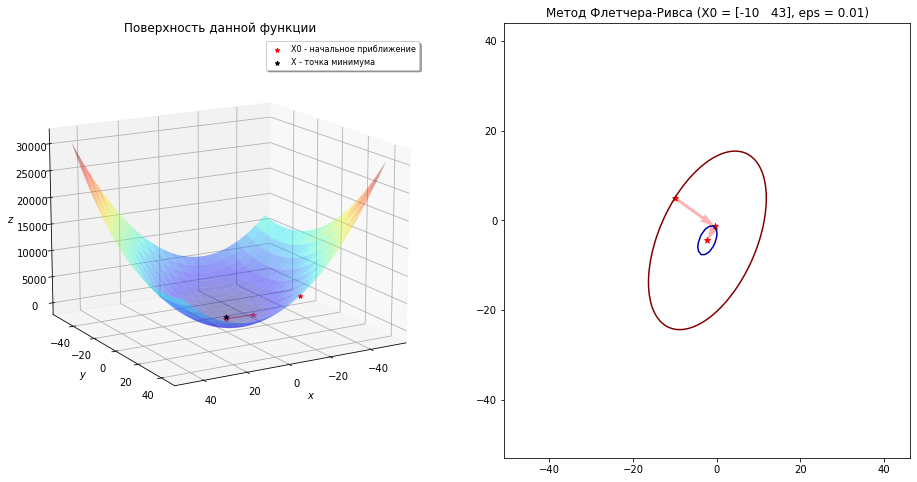

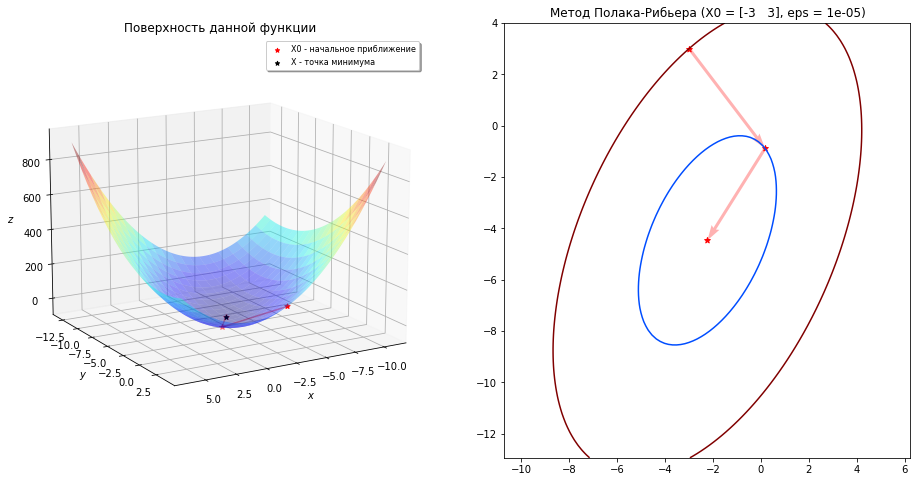

In [2]:
from ast import While
from cmath import sqrt
from operator import mod
from scipy import optimize
import numpy as np
import sympy as sp
import math
import matplotlib.pyplot as plt


# Параметры методов:
eps = 0.01
X0 = np.array([2, 2])

#Функции
f1 = lambda x, y: 10*x**2-4*x*y+7*y**2-4*5**(1/2)*(5*x-y)-16
f2 = lambda x, y: 6*x**2-4*x*y+3*y**2+4*5**(1/2)*(x+2*y)+22 
f = f2

#считывание в матрицу
mat1 = np.array([[10,-2],[-2,7]])
mat2 = np.array([[6,-2],[-2,3]])
mat = mat2

# Вычисление градиента:
x_sym, y_sym = sp.Symbol('x'), sp.Symbol('y')
Grad_f = sp.tensor.array.derive_by_array(f(x_sym, y_sym), [x_sym, y_sym])
Grad_f = sp.lambdify((x_sym, y_sym), Grad_f, 'numpy')


#Метод золотого сечения
def golden_ratio(phi, n, b = 2.5, a = 0, e = eps):
    tau = (math.sqrt(5) + 1) / 2
    Ak, Bk = a, b
    lk = Bk - Ak
    Xk1 = Ak + lk / (tau + 1)
    Xk2 = Bk - lk / (tau + 1)
    y1, y2 = phi(Xk1), phi(Xk2)
    n += 2
    while lk > e/1000:
        if y1 > y2:
            Ak = Xk1
            Xk1 = Xk2
            y1 = y2
            Xk2 = Bk - (Bk - Ak) / (tau + 1)
            y2 = phi(Xk2)
        else:
            Bk = Xk2
            Xk2 = Xk1
            y2 = y1
            Xk1 = Ak + (Bk - Ak) / (tau + 1)
            y1 = phi(Xk1)
        lk = Bk - Ak
        n += 1

    return (Ak + Bk) / 2, n


#Метод сопряженных градиентов
def conjugate_directions(X0, eps, method):
    w = lambda X: -np.array(Grad_f(X[0], X[1]))
    fun = lambda X: f(X[0], X[1])
    X = X0
    n = 0
    phi = lambda kappa: fun(X + kappa * p1)
    kappa_list, X_p, Y_p = np.empty(0), np.empty(0), np.empty(0)
    X_p = np.append(X_p, X[0])
    Y_p = np.append(Y_p, X[1])
    p1 = w1 = w(X)
    g = i = 1 
    while (np.linalg.norm(w1))>eps:
        phi = lambda kappa: fun(X+kappa*p1)
        kappa,n = golden_ratio(phi, n, e = eps)

        Xk = X+kappa * p1
        w2 = w(Xk)
        g += 1
   
        # выбираем способ
        if  method == 1:
            gamma = -np.matmul(mat.dot(p1), w2)/np.matmul(mat.dot(p1), p1) #метод споряженных направлений
        elif method == 2:
            gamma = np.linalg.norm(w2)**2/np.dot(w1, p1) #метод сопряженных градиентов
        elif method == 3:
            gamma = np.linalg.norm(w2)**2/np.linalg.norm(w1)**2 #метод Флетчера-Ривса
        elif method == 4:
            gamma = np.dot(w2-w1, w2)/np.linalg.norm(w1)**2 #метод Полака-Рибьера  

       
        if i % 2 == 0:
            gamma = 0 

        p2 = gamma * p1 + w2
        w1 = w2
        p1 = p2
        X = Xk
        X_p = np.append(X_p, X[0])
        Y_p = np.append(Y_p, X[1])
        i += 1

    return X, X_p, Y_p, i, n, g



#картинки
def DrawSurfContourAndWk(X2, X3, X4, X2_p, Y2_p, X3_p, Y3_p, X4_p, Y4_p):
    fig = plt.figure(figsize =(12,5))
    #fig.canvas.manager.full_screen_toggle()

    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)
    
    fig.canvas.manager.set_window_title('Методы сопряженного градиента')


    delta = max(abs(X2[0] - X0[0]), abs(X2[1] - X0[1])) + 0.3
    X, Y = np.meshgrid(np.linspace(X2[0] - delta, X2[0] + delta, 50),
    np.linspace(X2[1] - delta, X2[1] + delta, 50))
    # X, Y = np.meshgrid(X_p1, Y_p1)
    Z = f(X, Y)
    axes1.contourf(X, Y, Z, levels = Val(X2_p, Y2_p))
    axes1.plot(X2_p, Y2_p, marker='o', markersize=3, color='red')
    axes1.set_xlabel('$x$')
    axes1.set_ylabel('$y$')
    axes1.set_title('Метод сопряженных градиентов')

   
    delta = max(abs(X3[0] - X0[0]), abs(X3[1] - X0[1])) + 0.3
    X, Y = np.meshgrid(np.linspace(X3[0] - delta, X3[0] + delta, 50),
    np.linspace(X3[1] - delta, X3[1] + delta, 50))
    # X, Y = np.meshgrid(X_p1, Y_p1)
    Z = f(X, Y)
    axes2.contourf(X, Y, Z, levels = Val(X3_p, Y3_p))
    axes2.plot(X3_p, Y3_p, marker='o', markersize=3, color='red')
    axes2.set_xlabel('$x$')
    axes2.set_ylabel('$y$')
    axes2.set_title('Метод Флетчера-Ривса')



    delta = max(abs(X4[0] - X0[0]), abs(X4[1] - X0[1])) + 0.3
    X, Y = np.meshgrid(np.linspace(X4[0] - delta, X4[0] + delta, 50),
    np.linspace(X4[1] - delta, X4[1] + delta, 50))
    #X, Y = np.meshgrid(X_p2, Y_p2)
    Z = f(X, Y)
    axes3.contourf(X, Y, Z, levels = Val(X4_p, Y4_p))
    axes3.plot(X4_p, Y4_p, marker='o', markersize=3, color='red')
    axes3.set_xlabel('$x$')
    axes3.set_ylabel('$y$')
    axes3.set_title('Метод Полака-Рибьера')


# линии уровня трех графиков
def DrawSurfContour(X2, X3, X4, X2_p, Y2_p, X3_p, Y3_p, X4_p, Y4_p):
    fig = plt.figure(figsize =(12,5))
    # fig.canvas.manager.full_screen_toggle()

    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)
    
    fig.canvas.manager.set_window_title('Методы сопряженного градиента')


    delta = max(abs(X2[0] - X0[0]), abs(X2[1] - X0[1])) + 0.3
    X, Y = np.meshgrid(np.linspace(X2[0] - delta, X2[0] + delta, 50),
    np.linspace(X2[1] - delta, X2[1] + delta, 50))
    # X, Y = np.meshgrid(X_p1, Y_p1)
    Z = f(X, Y)
    axes1.contour(X, Y, Z, levels = Val(X2_p, Y2_p))
    axes1.plot(X2_p, Y2_p, marker='o', markersize=3, color='red')
    axes1.set_xlabel('$x$')
    axes1.set_ylabel('$y$')
    axes1.set_title('Метод сопряженных градиентов')

   
    delta = max(abs(X3[0] - X0[0]), abs(X3[1] - X0[1])) + 0.3
    X, Y = np.meshgrid(np.linspace(X3[0] - delta, X3[0] + delta, 50),
    np.linspace(X3[1] - delta, X3[1] + delta, 50))
    # X, Y = np.meshgrid(X_p1, Y_p1)
    Z = f(X, Y)
    axes2.contour(X, Y, Z, levels = Val(X3_p, Y3_p))
    axes2.plot(X3_p, Y3_p, marker='o', markersize=3, color='red')
    axes2.set_xlabel('$x$')
    axes2.set_ylabel('$y$')
    axes2.set_title('Метод Флетчера-Ривса')


    delta = max(abs(X4[0] - X0[0]), abs(X4[1] - X0[1])) + 0.3
    X, Y = np.meshgrid(np.linspace(X4[0] - delta, X4[0] + delta, 50),
    np.linspace(X4[1] - delta, X4[1] + delta, 50))
    #X, Y = np.meshgrid(X_p2, Y_p2)
    Z = f(X, Y)
    axes3.contour(X, Y, Z, levels = Val(X4_p, Y4_p))
    axes3.plot(X4_p, Y4_p, marker='o', markersize=3, color='red')
    axes3.set_xlabel('$x$')
    axes3.set_ylabel('$y$')
    axes3.set_title('Метод Полака-Рибьера')


#3D и линии уровня одного графика
def Draw(X_, X_p, Y_p, k, X0, eps):

    delta = max(abs(X_[0] - X0[0]), abs(X_[1] - X0[1])) + 1
    X, Y = np.meshgrid(np.linspace(X_[0] - delta, X_[0] + delta,  100),
    np.linspace(X_[1] - delta, X_[1] + delta, 100))
    Z = f(X, Y)


    #Angles needed for quiver plot
    anglesx = X_p[1:] - X_p[:-1]
    anglesy = Y_p[1:] - Y_p[:-1]

    fig = plt.figure(figsize = (16,8))



    #Surface plot
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.plot_surface(X, Y, Z, rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
    ax.plot(X_p, Y_p, f(X_p,Y_p), color = 'r', marker = '*', alpha = .4)


    

    #ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor = 'none')
    ax.scatter(X0[0], X0[1], f(X0[0], X0[1]), s=20, marker='*', c='red', label='X0 - начальное приближение')
    ax.scatter(X_[0], X_[1], f(X_[0], X_[1]), s=20, marker='*', c='black', label='X - точка минимума')
    ax.legend(shadow = True, fontsize = 8)
    ax.view_init(15, 60)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')
    ax.set_title('Поверхность данной функции')


   
    #Contour plot
    ax = fig.add_subplot(1, 2, 2)
    if k == 1:
        fig.canvas.manager.set_window_title('Метод сопряженных направлений')
        ax.set_title('Метод сопряженных направлений (X0 = [' + str(X0[0])+'   '+ str(X0[1])+'], eps = '+str(eps)+')')
    elif k == 2:
        fig.canvas.manager.set_window_title('Метод сопряженных градиентов')
        ax.set_title('Метод сопряженных градиентов (X0 = [' + str(X0[0])+'   '+ str(X0[1])+'], eps = '+str(eps)+')')
    elif k == 3:
        fig.canvas.manager.set_window_title('Метод Флетчера-Ривса')
        ax.set_title('Метод Флетчера-Ривса (X0 = [' + str(X0[0])+'   '+ str(X0[1])+'], eps = '+str(eps)+')')

    elif k == 4:
        fig.canvas.manager.set_window_title('Метод Полака-Рибьера')
        ax.set_title('Метод Полака-Рибьера (X0 = [' + str(X0[0])+'   '+ str(X0[1])+'], eps = '+str(eps)+')')

    ax.contour(X, Y, Z, levels = Val(X_p, Y_p), cmap = 'jet')
    
    # Plotting the iterations and intermediate values
    ax.scatter(X_p, Y_p, color = 'r', marker = '*')
    ax.quiver(X_p[:-1], Y_p[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .3)
    


# Таблица точек и значений
def DrawPoints(X_p, Y_p):
    for x in range(len(X_p)):
        print('X = [',np.round(X_p[x],6), ' ',np.round(Y_p[x],6),']','\tf = ',np.round(f(X_p[x],Y_p[x]),6))
    print()


# Значения функции
def Val(X_p, Y_p):
    Value = []
    for i in range(len(X_p)):
        Value.insert(0, f(X_p[i],Y_p[i]))
    return Value


def DrawValue(X_p, Y_p):
    for x in Val(X_p,Y_p):
        print('Value = ', np.round(x,6))

    print()

    
##############################################################################################################################################################################
##############################################################################################################################################################################
##############################################################################################################################################################################


print(" " * 20,' Методы сопряженных градиентов')
print('Дано:')
print('Целевая функция:        f(x, y) = ', f(x_sym, y_sym))



X1, X1_p, Y1_p, i1, n1, g1 = conjugate_directions([5, 5], 0.001, 1)
DrawPoints(X1_p, Y1_p)
Draw(X1, X1_p, Y1_p, 1, [3, 3], 0.001)

X2, X2_p, Y2_p, i2, n2, g2= conjugate_directions([2, 3], 0.000001, 2)
DrawPoints(X2_p, Y2_p)
Draw(X2, X2_p, Y2_p, 2,[2, 3], 0.000001)

X3, X3_p, Y3_p, i3, n3, g3  = conjugate_directions([-10, 5], 0.01, 3)
DrawPoints(X3_p, Y3_p)
Draw(X3, X3_p, Y3_p, 3,[-10, 43], 0.01)

X4, X4_p, Y4_p, i4, n4, g4 = conjugate_directions([-3, 3], 0.000001, 4)
DrawPoints(X4_p, Y4_p)
Draw(X4, X4_p, Y4_p, 4,[-3, 3], 0.00001)
 
# X1, X1_p, Y1_p, i1, n1, g1 = conjugate_directions([5, 5], 0.001, 1)
# DrawPoints(X1_p, Y1_p)
# Draw(X1, X1_p, Y1_p, 1, [5, 5], 0.001)

# X2, X2_p, Y2_p, i2, n2, g2 = conjugate_directions([5, 5], 0.001, 2)
# DrawPoints(X2_p, Y2_p)
# Draw(X2, X2_p, Y2_p, 2,[5, 5], 0.001)

# X3, X3_p, Y3_p, i3, n3, g3 = conjugate_directions([5, 5], 0.001, 3)
# DrawPoints(X3_p, Y3_p)
# Draw(X3, X3_p, Y3_p, 3,[5, 5], 0.001)

# X4, X4_p, Y4_p, i4, n4, g4 = conjugate_directions([5, 5], 0.001, 4)
# DrawPoints(X4_p, Y4_p)
# Draw(X4, X4_p, Y4_p, 4,[5, 5], 0.001)


print()
print('**********************************************************************************************************************************************************************')
print('Методы\t\t\t', '    МСГ\t\t\t', '    Флетчера-Ривса\t\t\t', '    Полака-Рибьера')
print('Xmin  \t\t',  X2,'\t\t', X3,'\t', X4)
print('f(Xmin)\t\t', f(X2[0], X2[1]),'\t\t\t', f(X3[0],X3[1]),'\t\t\t', f(X4[0], X4[1]))
print('i\t\t\t', i2,'\t\t\t\t\t',i3,'\t\t\t\t\t',i4)
print('n\t\t\t', n2,'\t\t\t\t\t',n3,'\t\t\t\t\t',n4)
print('g\t\t\t', g2,'\t\t\t\t\t',g3,'\t\t\t\t\t',g4)
print('**********************************************************************************************************************************************************************')


plt.show()


***Розенброк***

                      Методы сопряженных градиентов
Дано:
Целевая функция:        f(x, y) =  (x - 1)**2 + (x**2 - y)**2
Начальное приближение:  X =  [2.23606798+0.j 2.23606798+0.j]
Точность вычисления:    Eps =  0.01
Овражгость:             alpha =  1
X =  [1.016735+0.j 1.040802+0.j]
f =  (0.00033+0j)
i =  6
n =  44
g =  7


TypeError: Image data of dtype complex128 cannot be converted to float

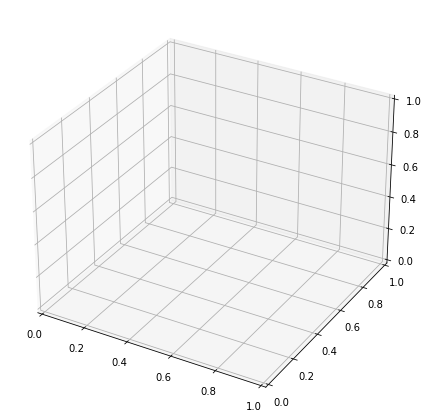

In [5]:
from ast import While
from operator import mod
from scipy import optimize
import numpy as np
import sympy as sp
import math
import matplotlib.pyplot as plt



# Параметры методов:
alpha = 1
eps = 0.01
X0 = np.array([sqrt(5), sqrt(5)])

# функция Розенброка
f = lambda x, y: alpha * (x**2 - y)**2 + (x - 1)**2


# Вычисление градиента:
x_sym, y_sym = sp.Symbol('x'), sp.Symbol('y')
Grad_f = sp.tensor.array.derive_by_array(f(x_sym, y_sym), [x_sym, y_sym])
Grad_f = sp.lambdify((x_sym, y_sym), Grad_f, 'numpy')



#Метод золотого сечения
def golden_ratio(phi, n, b = 0.5, a = 0, e = eps):
    tau = (math.sqrt(5) + 1) / 2
    Ak, Bk = a, b
    lk = Bk - Ak
    Xk1 = Ak + ((Bk - Ak) - (Bk - Ak) / tau)
    Xk2 = Ak + (Bk - Ak) / tau
    y1, y2 = phi(Xk1), phi(Xk2)
    n += 2
    while lk >= e/1000:
        if y1 >= y2:
            Ak = Xk1
            Xk1 = Xk2
            Xk2 = Ak + Bk - Xk1
            y1 = y2
            y2 = phi(Xk2)
            n +=1
        else:
            Bk = Xk2
            Xk2 = Xk1
            Xk1 = Ak + Bk - Xk2
            y2 = y1
            y1 = phi(Xk1)
            n +=1
        lk = Bk - Ak
    return (Ak + Bk) / 2, n


#Метод сопряженных градиентов
def conjugate_directions(method):
    w = lambda X: -np.array(Grad_f(X[0], X[1]))
    fun = lambda X: f(X[0], X[1])
    X = X0
    n = 0
    phi = lambda kappa: fun(X + kappa * p1)
    kappa_list, X_p, Y_p = np.empty(0), np.empty(0), np.empty(0)
    X_p = np.append(X_p, X[0])
    Y_p = np.append(Y_p, X[1])
    kappa_list = np.append(kappa_list, 0.1)
    p1 = w1 = w(X)
    g = i = 1   
    if np.linalg.norm(w1) < eps:
         return X, X_p, Y_p, i, n, g, kappa_list
    
    while (True):
        
        #kappa, n = golden_ratio(phi, n) #находим каппу
        kappa, _, n = optimize.golden(phi, brack=(0,0.5), full_output=True) #находим каппу
        kappa_list = np.append(kappa_list, kappa)

        Xk = X + kappa * p1 #следующая точка
        w2 = w(Xk)
        g += 1
        if np.linalg.norm(w2) < eps:
            break

          
        # выбираем способ
        if method == 2:
            gamma = ((np.linalg.norm(w2))**2)/np.dot(w1, p1) #метод сопряженных градиентов
        elif method == 3:
            gamma = ((np.linalg.norm(w2))**2)/((np.linalg.norm(w1))**2) #метод Флетчера-Ривса
        elif method == 4:
            gamma = np.dot((w2-w1), w2)/((np.linalg.norm(w1))**2) #метод Полака-Рибьера  

        if i % 2 == 0:
            gamma = 0     

        p2 = gamma * p1 + w2
        w1 = w2
        p1 = p2
        X = Xk
        X_p = np.append(X_p, X[0])
        Y_p = np.append(Y_p, X[1])
        i += 1

    return X, X_p, Y_p, i, n, g, kappa_list



#Не очень картинки
def DrawSurfContourAndWk(X2, X3, X4, X2_p, Y2_p, X3_p, Y3_p, X4_p, Y4_p):
    fig = plt.figure(figsize =(12,5))
    #fig.canvas.manager.full_screen_toggle()

    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)
    
    fig.canvas.manager.set_window_title('Методы сопряженного градиента')


    delta = max(abs(X2[0] - X0[0]), abs(X2[1] - X0[1])) + 0.3
    X, Y = np.meshgrid(np.linspace(X2[0] - delta, X2[0] + delta, 50),
    np.linspace(X2[1] - delta, X2[1] + delta, 50))
    # X, Y = np.meshgrid(X_p1, Y_p1)
    Z = f(X, Y)
    axes1.contour(X, Y, Z, levels = Val(X2_p, Y2_p))
    axes1.plot(X2_p, Y2_p, marker='o', markersize=3, color='red')
    axes1.set_xlabel('$x$')
    axes1.set_ylabel('$y$')
    axes1.set_title('Метод сопряженных градиентов')

   
    delta = max(abs(X3[0] - X0[0]), abs(X3[1] - X0[1])) + 0.3
    X, Y = np.meshgrid(np.linspace(X3[0] - delta, X3[0] + delta, 50),
    np.linspace(X3[1] - delta, X3[1] + delta, 50))
    # X, Y = np.meshgrid(X_p1, Y_p1)
    Z = f(X, Y)
    axes2.contour(X, Y, Z, levels = Val(X3_p, Y3_p))
    axes2.plot(X3_p, Y3_p, marker='o', markersize=3, color='red')
    axes2.set_xlabel('$x$')
    axes2.set_ylabel('$y$')
    axes2.set_title('Метод Флетчера-Ривса')



    delta = max(abs(X4[0] - X0[0]), abs(X4[1] - X0[1])) + 0.3
    X, Y = np.meshgrid(np.linspace(X4[0] - delta, X4[0] + delta, 50),
    np.linspace(X4[1] - delta, X4[1] + delta, 50))
    #X, Y = np.meshgrid(X_p2, Y_p2)
    Z = f(X, Y)
    axes3.contour(X, Y, Z, levels = Val(X4_p, Y4_p))
    axes3.plot(X4_p, Y4_p, marker='o', markersize=3, color='red')
    axes3.set_xlabel('$x$')
    axes3.set_ylabel('$y$')
    axes3.set_title('Метод Полака-Рибьера')


#3D и линии уровня двух графиков
def DrawSurfContour(X2, X3, X4, X2_p, Y2_p, X3_p, Y3_p, X4_p, Y4_p):
    fig = plt.figure(figsize =(12,5))
    # fig.canvas.manager.full_screen_toggle()

    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)
    
    fig.canvas.manager.set_window_title('Методы сопряженного градиента')



 #Angles needed for quiver plot
    anglesx2 = X2_p[1:] - X2_p[:-1]
    anglesy2 = Y2_p[1:] - Y2_p[:-1]

    delta = max(abs(X2[0] - X0[0]), abs(X2[1] - X0[1])) + 0.3
    X, Y = np.meshgrid(np.linspace(X2[0] - delta, X2[0] + delta, 50),
    np.linspace(X2[1] - delta, X2[1] + delta, 50))
    # X, Y = np.meshgrid(X_p1, Y_p1)
    Z = f(X, Y)
    axes1.contourf(X, Y, Z, levels = Val(X2_p, Y2_p))
    axes1.plot(X2_p, Y2_p, marker='o', markersize=3, color='red')
    axes1.set_xlabel('$x$')
    axes1.set_ylabel('$y$')
    axes1.set_title('Метод сопряженных градиентов')
    axes1.quiver(X2_p[:-1], Y2_p[:-1], anglesx2, anglesy2, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .3)

   

   #Angles needed for quiver plot
    anglesx3 = X3_p[1:] - X3_p[:-1]
    anglesy3 = Y3_p[1:] - Y3_p[:-1]
    delta = max(abs(X3[0] - X0[0]), abs(X3[1] - X0[1])) + 0.3
    X, Y = np.meshgrid(np.linspace(X3[0] - delta, X3[0] + delta, 50),
    np.linspace(X3[1] - delta, X3[1] + delta, 50))
    # X, Y = np.meshgrid(X_p1, Y_p1)
    Z = f(X, Y)
    axes2.contourf(X, Y, Z, levels = Val(X3_p, Y3_p))
    axes2.plot(X3_p, Y3_p, marker='o', markersize=3, color='red')
    axes2.set_xlabel('$x$')
    axes2.set_ylabel('$y$')
    axes2.set_title('Метод Флетчера-Ривса')
    axes2.quiver(X3_p[:-1], Y3_p[:-1], anglesx3, anglesy3, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .3)

# Angles needed for quiver plot
    anglesx4 = X4_p[1:] - X4_p[:-1]
    anglesy4 = Y4_p[1:] - Y4_p[:-1]
    delta = max(abs(X4[0] - X0[0]), abs(X4[1] - X0[1])) + 0.3
    X, Y = np.meshgrid(np.linspace(X4[0] - delta, X4[0] + delta, 50),
    np.linspace(X4[1] - delta, X4[1] + delta, 50))
    #X, Y = np.meshgrid(X_p2, Y_p2)
    Z = f(X, Y)
    axes3.contourf(X, Y, Z, levels = Val(X4_p, Y4_p))
    axes3.plot(X4_p, Y4_p, marker='o', markersize=3, color='red')
    axes3.set_xlabel('$x$')
    axes3.set_ylabel('$y$')
    axes3.set_title('Метод Полака-Рибьера')
    axes3.quiver(X4_p[:-1], Y4_p[:-1], anglesx4, anglesy4, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .3)


#3D и линии уровня одного графика
def Draw(X_, X_p, Y_p, k, X0, eps):

    delta = max(abs(X_[0] - X0[0]), abs(X_[1] - X0[1])) + 1
    X, Y = np.meshgrid(np.linspace(X_[0] - delta, X_[0] + delta,  100),
    np.linspace(X_[1] - delta, X_[1] + delta, 100))
    Z = f(X, Y)


    #Angles needed for quiver plot
    anglesx = X_p[1:] - X_p[:-1]
    anglesy = Y_p[1:] - Y_p[:-1]

    fig = plt.figure(figsize = (16,8))

    


    #Surface plot
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.plot_surface(X, Y, Z, rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
    ax.plot(X_p, Y_p, f(X_p,Y_p), color = 'r', marker = '*', alpha = .4)



    if k == 1:
        fig.canvas.manager.set_window_title('Метод сопряженных направлений')
        ax.set_title('Метод сопряженных направлений (X0 = [' + str(X0[0])+'   '+ str(X0[1])+'], eps = '+str(eps)+')')
    elif k == 2:
        fig.canvas.manager.set_window_title('Метод сопряженных градиентов')
        ax.set_title('Метод сопряженных градиентов (X0 = [' + str(X0[0])+'   '+ str(X0[1])+'], eps = '+str(eps)+')')
    elif k == 3:
        fig.canvas.manager.set_window_title('Метод Флетчера-Ривса')
        ax.set_title('Метод Флетчера-Ривса (X0 = [' + str(X0[0])+'   '+ str(X0[1])+'], eps = '+str(eps)+')')

    elif k == 4:
        fig.canvas.manager.set_window_title('Метод Полака-Рибьера')
        ax.set_title('Метод Полака-Рибьера (X0 = [' + str(X0[0])+'   '+ str(X0[1])+'], eps = '+str(eps)+')')




    #ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor = 'none')
    ax.scatter(X0[0], X0[1], f(X0[0], X0[1]), s=20, marker='*', c='red', label='X0 - начальное приближение')
    ax.scatter(X_[0], X_[1], f(X_[0], X_[1]), s=20, marker='*', c='black', label='X - точка минимума')
    ax.legend(shadow = True, fontsize = 8)
    ax.view_init(15, 60)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')
    ax.set_title('Поверхность данной функции')


   
    #Contour plot
    ax = fig.add_subplot(1, 2, 2)
    ax.contourf(X, Y, Z, levels = Val(X_p, Y_p), cmap = 'jet')
    
    # Plotting the iterations and intermediate values
    ax.scatter(X_p, Y_p, color = 'r', marker = '*')
    ax.quiver(X_p[:-1], Y_p[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .3)
    


# Таблица точек и значений
def DrawPoints(X_p, Y_p, kappa_):
    for x in range(len(X_p)):
        #print('X = [','%.3f' % X_p[x], ' ','%.3f' % Y_p[x],']','\tf = ','%.3f' % f(X_p[x],Y_p[x]),'\tkappa = ','%.3f' % kappa_[x])
        print('X = [', np.round(X_p[x],6), ' ',np.round(Y_p[x],6),']\t',np.round(f(X_p[x],Y_p[x]),6),'\tkappa = ',np.round(kappa_[x],6))

    print()

# Значения функции
def Val(X_p, Y_p):
    Value = []
    for i in range(len(X_p)):
        Value.insert(0, f(X_p[i],Y_p[i]))
    return Value


def DrawValue(X_p, Y_p):
    for x in Val(X_p,Y_p):
        print('Value = ', np.round(x,6))

    print()

##############################################################################################################################################################################
##############################################################################################################################################################################
##############################################################################################################################################################################


print(" " * 20,' Методы сопряженных градиентов')
print('Дано:')
print('Целевая функция:        f(x, y) = ', f(x_sym, y_sym))
print('Начальное приближение:  X = ', X0)
print('Точность вычисления:    Eps = ', eps)
print('Овражность:             alpha = ', alpha)


var = 4

if var == 2:
    X2, X2_p, Y2_p, i2, n2, g2, kappa_2 = conjugate_directions(2)
    print('X = ', X2)
    print('f = ', f(X2[0],X2[1]))
    print('i = ', i2)
    print('n = ', n2)
    print('g = ', g2)
    #DrawPoints(X2_p, Y2_p, kappa_2) # таблица точек и значений 3
    #DrawValue(X2_p, Y2_p)
    Draw(X2, X2_p, Y2_p, 2, X0, eps)
elif var == 3:
    X3, X3_p, Y3_p, i3, n3, g3, kappa_3 = conjugate_directions(3)
    print('X = ', X3)
    print('f = ', f(X3[0],X3[1]))
    print('i = ', i3)
    print('n = ', n3)
    print('g = ', g3)
    #DrawPoints(X3_p, Y3_p, kappa_3) # таблица точек и значений 3
    #DrawValue(X3_p, Y3_p)
    Draw(X3, X3_p, Y3_p, 3, X0,eps)
elif var == 4:
    X4, X4_p, Y4_p, i4, n4, g4, kappa_4 = conjugate_directions(4)
    print('X = ', np.round(X4, 6))
    print('f = ', np.round(f(X4[0], X4[1]),6))
    print('i = ', i4)
    print('n = ', n4)
    print('g = ', g4)
    #DrawPoints(X4_p, Y4_p, kappa_4) # таблица точек и значений 4
    #DrawValue(X4_p, Y4_p)
    Draw(X4, X4_p, Y4_p,4,X0,eps)
elif var == 0:
    X2, X2_p, Y2_p, i2, n2, g2, kappa_2 = conjugate_directions(2)
    X3, X3_p, Y3_p, i3, n3, g3, kappa_3 = conjugate_directions(3)
    X4, X4_p, Y4_p, i4, n4, g4, kappa_4 = conjugate_directions(4)
    print()
    print('**********************************************************************************************************************************************************************')
    print('Методы\t\t\t', '    МСГ\t\t\t', '    Флетчера-Ривса\t\t\t', '    Полака-Рибьера')
    print('Xmin  \t\t',  X2,'\t\t', X3,'\t', X4)
    print('f(Xmin)\t\t', f(X2[0], X2[1]),'\t\t\t', f(X3[0],X3[1]),'\t\t\t', f(X4[0], X4[1]))
    print('i\t\t\t', i2,'\t\t\t\t\t',i3,'\t\t\t\t\t',i4)
    print('n\t\t\t', n2,'\t\t\t\t\t',n3,'\t\t\t\t\t',n4)
    print('g\t\t\t', g2,'\t\t\t\t\t',g3,'\t\t\t\t\t',g4)
    print('**********************************************************************************************************************************************************************')
    DrawSurfContour(X2, X3, X4, X2_p, Y2_p, X3_p, Y3_p, X4_p, Y4_p)
    #DrawSurfContourAndWk(X2, X3, X4, X2_p, Y2_p, X3_p, Y3_p, X4_p, Y4_p)
elif var == 234:
    X2, X2_p, Y2_p, i2, n2, g2, kappa_2 = conjugate_directions(2)
    X3, X3_p, Y3_p, i3, n3, g3, kappa_3 = conjugate_directions(3)
    X4, X4_p, Y4_p, i4, n4, g4, kappa_4 = conjugate_directions(4)
    print()
    print('**********************************************************************************************************************************************************************')
    print('Методы\t\t\t', '    МСГ\t\t\t', '    Флетчера-Ривса\t\t\t', '    Полака-Рибьера')
    print('Xmin  \t\t',  X2,'\t\t', X3,'\t', X4)
    print('f(Xmin)\t\t', f(X2[0], X2[1]),'\t\t\t', f(X3[0],X3[1]),'\t\t\t', f(X4[0], X4[1]))
    print('i\t\t\t', i2,'\t\t\t\t\t',i3,'\t\t\t\t\t',i4)
    print('n\t\t\t', n2,'\t\t\t\t\t',n3,'\t\t\t\t\t',n4)
    print('g\t\t\t', g2,'\t\t\t\t\t',g3,'\t\t\t\t\t',g4)
    print('**********************************************************************************************************************************************************************')
    #DrawPoints(X2_p, Y2_p, kappa_2) # таблица точек и значений 3
    Draw(X2, X2_p, Y2_p, 2, X0, eps)
    #DrawPoints(X3_p, Y3_p, kappa_3) # таблица точек и значений
    Draw(X3, X3_p, Y3_p, 3, X0, eps)
    #DrawPoints(X4_p, Y4_p, kappa_4) # таблица точек и значений
    Draw(X4, X4_p, Y4_p, 4, X0, eps)



plt.show()



# Тест

# Все методы дают одно и то же
# X0 = [-1 -2]
# eps = 0.001
# alpha = 1

In [17]:
#Метод сопряженных градиентов
def conjugate_directions(X0, eps, method):
    w = lambda X: -np.array(Grad_f(X[0], X[1]))
    fun = lambda X: f(X[0], X[1])
    X = X0
    n = 0
    phi = lambda kappa: fun(X + kappa * p1)
    kappa_list, X_p, Y_p = np.empty(0), np.empty(0), np.empty(0)
    X_p = np.append(X_p, X[0])
    Y_p = np.append(Y_p, X[1])
    kappa_list = np.append(kappa_list, 0.1)
    p1 = w1 = w(X)
    g = i = 1
    while (np.linalg.norm(w1))>eps:
        phi = lambda kappa: fun(X+kappa*p1)
        #kappa,n = golden_ratio(phi,n)
        kappa, arg, n = optimize.golden(phi,full_output=True)
        kappa_list = np.append(kappa_list, kappa)

        Xk = X+kappa * p1
        w2 = w(Xk)
        g += 1
   
        # выбираем способ
        if  method == 1:
            gamma = -np.matmul(mat.dot(p1), w2)/np.matmul(mat.dot(p1), p1) #метод споряженных направлений
        elif method == 2:
            gamma = np.linalg.norm(w2)**2/np.dot(w1, p1) #метод сопряженных градиентов
        elif method == 3:
            gamma = np.linalg.norm(w2)**2/np.linalg.norm(w1)**2 #метод Флетчера-Ривса
        elif method == 4:
            gamma = np.dot(w2-w1, w2)/np.linalg.norm(w1)**2 #метод Полака-Рибьера  

       
        if i % 2 == 0:
            gamma = 0 

        p2 = gamma * p1 + w2
        w1 = w2
        p1 = p2
        X = Xk
        X_p = np.append(X_p, X[0])
        Y_p = np.append(Y_p, X[1])
        i += 1

    return X, X_p, Y_p, i, n, g, kappa_list

***Метод Полака-Рибьера***

                      Методы сопряженных градиентов
Дано:
Целевая функция:        f(x, y) =  (x - 1)**2 + 200*(x**2 - y)**2
Начальное приближение:  X =  [-3 -5]
Точность вычисления:    Eps =  0.001
X =  [0.99896  0.997915]
f =  1e-06
i =  519
n =  11418
g =  520
X = [ -3.0   -5.0 ]	 39216.0 	kappa =  0.1
X = [ 0.084153   -4.486097 ]	 4038.569536 	kappa =  9.2e-05
X = [ -0.440573   0.192932 ]	 2.075526 	kappa =  0.00258
X = [ -0.432415   0.194094 ]	 2.061926 	kappa =  0.002476
X = [ -0.403812   0.169149 ]	 1.978093 	kappa =  0.01
X = [ -0.399295   0.156092 ]	 1.960264 	kappa =  0.005365
X = [ -0.339374   0.108036 ]	 1.804118 	kappa =  0.01
X = [ -0.32979   0.113964 ]	 1.773754 	kappa =  0.002076
X = [ -0.30754   0.098956 ]	 1.71349 	kappa =  0.01
X = [ -0.292154   0.081457 ]	 1.672698 	kappa =  0.01
X = [ -0.223216   0.05839 ]	 1.510927 	kappa =  0.01
X = [ -0.220052   0.046572 ]	 1.489213 	kappa =  0.00345
X = [ -0.186415   0.031645 ]	 1.409511 	kappa =  0.01
X = [ -0.173145   0.037458

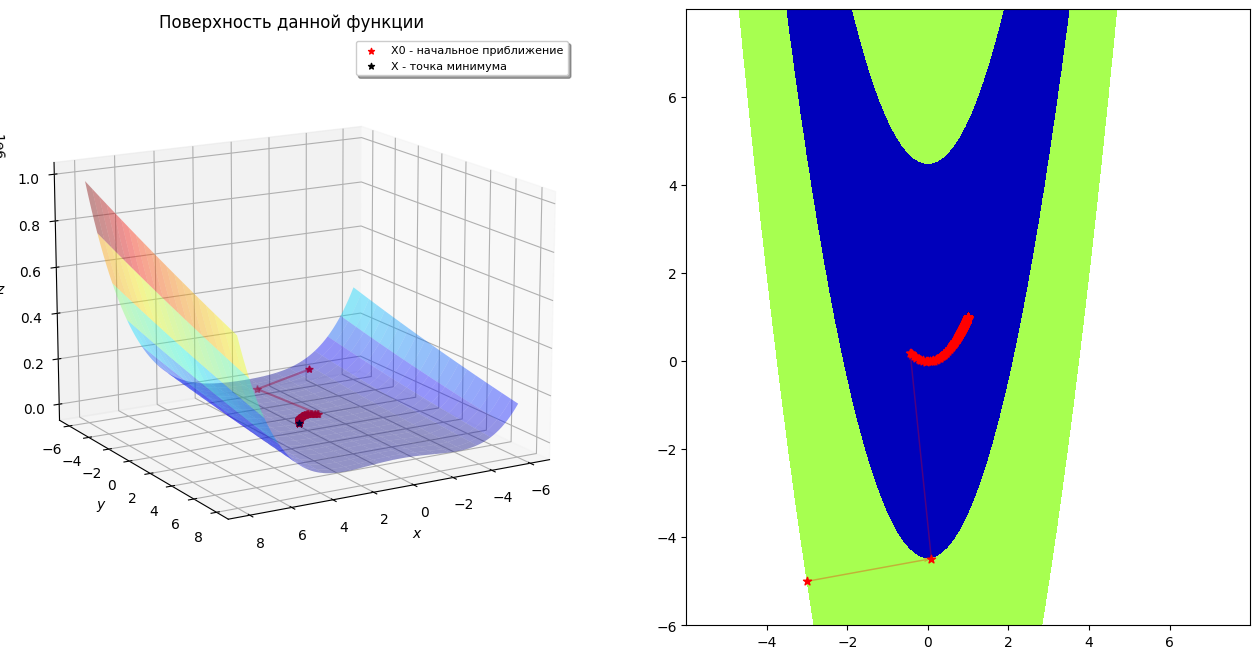

In [ ]:
from ast import While
import numpy as np
import sympy as sp
import math
import matplotlib.pyplot as plt



# Параметры методов:
alpha = 200
eps = 0.001
X0 = np.array([-3, -5])

# функция Розенброка
f = lambda x, y: alpha * (x**2 - y)**2 + (x - 1)**2


# Вычисление градиента:
x_sym, y_sym = sp.Symbol('x'), sp.Symbol('y')
Grad_f = sp.tensor.array.derive_by_array(f(x_sym, y_sym), [x_sym, y_sym])
Grad_f = sp.lambdify((x_sym, y_sym), Grad_f, 'numpy')



#Метод золотого сечения
def golden_ratio(phi, n, b = 0.01, a = 0, e = eps):
    tau = (math.sqrt(5) + 1) / 2
    Ak, Bk = a, b
    lk = Bk - Ak
    Xk1 = Ak + lk / (tau + 1)
    Xk2 = Bk - lk / (tau + 1)
    y1, y2 = phi(Xk1), phi(Xk2)
    n += 2
    while lk > e/1000:
        if y1 > y2:
            Ak = Xk1
            Xk1 = Xk2
            y1 = y2
            Xk2 = Bk - (Bk - Ak) / (tau + 1)
            y2 = phi(Xk2)
        else:
            Bk = Xk2
            Xk2 = Xk1
            y2 = y1
            Xk1 = Ak + (Bk - Ak) / (tau + 1)
            y1 = phi(Xk1)
        lk = Bk - Ak
        n += 1

    return (Ak + Bk) / 2, n


#Метод Полака-Рибьера
def conjugate_directions():
    w = lambda X: -np.array(Grad_f(X[0], X[1]))
    fun = lambda X: f(X[0], X[1])
    X = X0
    n = 0
    phi = lambda kappa: fun(X + kappa * p)
    kappa_list, X_p, Y_p = np.empty(0), np.empty(0), np.empty(0)
    X_p = np.append(X_p, X[0])
    Y_p = np.append(Y_p, X[1])
    kappa_list = np.append(kappa_list, 0.1)
    p = w(X)
    g = i = 1   
    if np.linalg.norm(w(X)) < eps:
         return X, X_p, Y_p, i, n, g, kappa_list
    
    while (True):
        
        kappa, n = golden_ratio(phi, n) #находим каппу
        kappa_list = np.append(kappa_list, kappa)

        Xk = X + kappa * p #следующая точка
        g += 1
        if np.linalg.norm(w(Xk)) < eps:
            break

        if i % 2 == 0:
            p = w(Xk)
        else:
            p = (np.dot((w(Xk)-w(X)), w(Xk))/((np.linalg.norm(w(X)))**2)) * w(X) + w(Xk) #метод Полака-Рибьера  
        X = Xk
        X_p = np.append(X_p, X[0])
        Y_p = np.append(Y_p, X[1])
        i += 1

    return X, X_p, Y_p, i, n, g, kappa_list



#Не очень картинки
def DrawSurfContourAndWk(X2, X3, X4, X2_p, Y2_p, X3_p, Y3_p, X4_p, Y4_p):
    fig = plt.figure(figsize =(12,5))
    #fig.canvas.manager.full_screen_toggle()

    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)
    
    fig.canvas.manager.set_window_title('Методы сопряженного градиента')


    delta = max(abs(X2[0] - X0[0]), abs(X2[1] - X0[1])) + 0.3
    X, Y = np.meshgrid(np.linspace(X2[0] - delta, X2[0] + delta, 50),
    np.linspace(X2[1] - delta, X2[1] + delta, 50))
    # X, Y = np.meshgrid(X_p1, Y_p1)
    Z = f(X, Y)
    axes1.contourf(X, Y, Z, levels = Val(X2_p, Y2_p))
    axes1.plot(X2_p, Y2_p, marker='o', markersize=3, color='red')
    axes1.set_xlabel('$x$')
    axes1.set_ylabel('$y$')
    axes1.set_title('Метод сопряженных градиентов')

   
    delta = max(abs(X3[0] - X0[0]), abs(X3[1] - X0[1])) + 0.3
    X, Y = np.meshgrid(np.linspace(X3[0] - delta, X3[0] + delta, 50),
    np.linspace(X3[1] - delta, X3[1] + delta, 50))
    # X, Y = np.meshgrid(X_p1, Y_p1)
    Z = f(X, Y)
    axes2.contourf(X, Y, Z, levels = Val(X3_p, Y3_p))
    axes2.plot(X3_p, Y3_p, marker='o', markersize=3, color='red')
    axes2.set_xlabel('$x$')
    axes2.set_ylabel('$y$')
    axes2.set_title('Метод Флетчера-Ривса')



    delta = max(abs(X4[0] - X0[0]), abs(X4[1] - X0[1])) + 0.3
    X, Y = np.meshgrid(np.linspace(X4[0] - delta, X4[0] + delta, 50),
    np.linspace(X4[1] - delta, X4[1] + delta, 50))
    #X, Y = np.meshgrid(X_p2, Y_p2)
    Z = f(X, Y)
    axes3.contourf(X, Y, Z, levels = Val(X4_p, Y4_p))
    axes3.plot(X4_p, Y4_p, marker='o', markersize=3, color='red')
    axes3.set_xlabel('$x$')
    axes3.set_ylabel('$y$')
    axes3.set_title('Метод Полака-Рибьера')


#3D и линии уровня двух графиков
def DrawSurfContour(X2, X3, X4, X2_p, Y2_p, X3_p, Y3_p, X4_p, Y4_p):
    fig = plt.figure(figsize =(12,5))
    # fig.canvas.manager.full_screen_toggle()

    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)
    
    fig.canvas.manager.set_window_title('Методы сопряженного градиента')


    delta = max(abs(X2[0] - X0[0]), abs(X2[1] - X0[1])) + 0.3
    X, Y = np.meshgrid(np.linspace(X2[0] - delta, X2[0] + delta, 50),
    np.linspace(X2[1] - delta, X2[1] + delta, 50))
    # X, Y = np.meshgrid(X_p1, Y_p1)
    Z = f(X, Y)
    cs1 = axes1.contour(X, Y, Z, levels = Val(X2_p, Y2_p))
    axes1.plot(X2_p, Y2_p, marker='o', markersize=3, color='red')
    axes1.set_xlabel('$x$')
    axes1.set_ylabel('$y$')
    axes1.set_title('Метод сопряженных градиентов')
    axes1.clabel(cs1)

   
    delta = max(abs(X3[0] - X0[0]), abs(X3[1] - X0[1])) + 0.3
    X, Y = np.meshgrid(np.linspace(X3[0] - delta, X3[0] + delta, 50),
    np.linspace(X3[1] - delta, X3[1] + delta, 50))
    # X, Y = np.meshgrid(X_p1, Y_p1)
    Z = f(X, Y)
    cs2 = axes2.contour(X, Y, Z, levels = Val(X3_p, Y3_p))
    axes2.plot(X3_p, Y3_p, marker='o', markersize=3, color='red')
    axes2.set_xlabel('$x$')
    axes2.set_ylabel('$y$')
    axes2.set_title('Метод Флетчера-Ривса')
    axes2.clabel(cs2)


    delta = max(abs(X4[0] - X0[0]), abs(X4[1] - X0[1])) + 0.3
    X, Y = np.meshgrid(np.linspace(X4[0] - delta, X4[0] + delta, 50),
    np.linspace(X4[1] - delta, X4[1] + delta, 50))
    #X, Y = np.meshgrid(X_p2, Y_p2)
    Z = f(X, Y)
    cs3 = axes3.contour(X, Y, Z, levels = Val(X4_p, Y4_p))
    axes3.plot(X4_p, Y4_p, marker='o', markersize=3, color='red')
    axes3.set_xlabel('$x$')
    axes3.set_ylabel('$y$')
    axes3.set_title('Метод Полака-Рибьера')
    axes3.clabel(cs3)


#3D и линии уровня одного графика
def Draw(X_, X_p, Y_p, k):

    delta = max(abs(X_[0] - X0[0]), abs(X_[1] - X0[1])) + 1
    X, Y = np.meshgrid(np.linspace(X_[0] - delta, X_[0] + delta,  100),
    np.linspace(X_[1] - delta, X_[1] + delta, 100))
    Z = f(X, Y)


    #Angles needed for quiver plot
    anglesx = X_p[1:] - X_p[:-1]
    anglesy = Y_p[1:] - Y_p[:-1]

    fig = plt.figure(figsize = (16,8))

    if k == 1:
        fig.canvas.manager.set_window_title('Метод сопряженных направлений')
    elif k == 2:
        fig.canvas.manager.set_window_title('Метод сопряженных градиентов')
    elif k == 3:
        fig.canvas.manager.set_window_title('Метод Флетчера-Ривса')
    elif k == 4:
        fig.canvas.manager.set_window_title('Метод Полака-Рибьера')


    


    #Surface plot
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.plot_surface(X, Y, Z, rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
    ax.plot(X_p, Y_p, f(X_p,Y_p), color = 'r', marker = '*', alpha = .4)

    #ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor = 'none')
    ax.scatter(X0[0], X0[1], f(X0[0], X0[1]), s=20, marker='*', c='red', label='X0 - начальное приближение')
    ax.scatter(X_[0], X_[1], f(X_[0], X_[1]), s=20, marker='*', c='black', label='X - точка минимума')
    ax.legend(shadow = True, fontsize = 8)
    ax.view_init(15, 60)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')
    ax.set_title('Поверхность данной функции')


   
    #Contour plot
    ax = fig.add_subplot(1, 2, 2)
    ax.contourf(X, Y, Z, levels = Val(X_p, Y_p), cmap = 'jet')
    
    # Plotting the iterations and intermediate values
    ax.scatter(X_p, Y_p, color = 'r', marker = '*')
    ax.quiver(X_p[:-1], Y_p[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .3)
    


# Таблица точек и значений
def DrawPoints(X_p, Y_p, kappa_):
    for x in range(len(X_p)):
        #print('X = [','%.3f' % X_p[x], ' ','%.3f' % Y_p[x],']','\tf = ','%.3f' % f(X_p[x],Y_p[x]),'\tkappa = ','%.3f' % kappa_[x])
        print('X = [', np.round(X_p[x],6), ' ',np.round(Y_p[x],6),']\t',np.round(f(X_p[x],Y_p[x]),6),'\tkappa = ',np.round(kappa_[x],6))

    print()

# Значения функции
def Val(X_p, Y_p):
    Value = []
    for i in range(len(X_p)):
        Value.insert(0, f(X_p[i],Y_p[i]))
    return Value


def DrawValue(X_p, Y_p):
    for x in Val(X_p,Y_p):
        print('Value = ', np.round(x,6))

    print()

##############################################################################################################################################################################
##############################################################################################################################################################################
##############################################################################################################################################################################


print(" " * 20,' Методы сопряженных градиентов')
print('Дано:')
print('Целевая функция:        f(x, y) = ', f(x_sym, y_sym))
print('Начальное приближение:  X = ', X0)
print('Точность вычисления:    Eps = ', eps)


X4, X4_p, Y4_p, i4, n4, g4, kappa_4 = conjugate_directions()
print('X = ', np.round(X4, 6))
print('f = ', np.round(f(X4[0], X4[1]),6))
print('i = ', i4)
print('n = ', n4)
print('g = ', g4)
DrawPoints(X4_p, Y4_p, kappa_4) # таблица точек и значений 4
Draw(X4, X4_p, Y4_p, 4)

plt.show()



# Тест

# Все методы дают одно и то же
# X0 = [-1 -2]
# eps = 0.001
# alpha = 1


# X0 = [-3 -5]
# eps = 0.001
# alpha = 10
# b = 1

# X0 = [-3 -5]
# eps = 0.001
# alpha = 200
# b = 0.01

                      Методы сопряженных градиентов
Дано:
Целевая функция:        f(x, y) =  (x - 1)**2 + 30*(x**2 - y)**2
Начальное приближение:  X =  [2 5]
Точность вычисления:    Eps =  0.001

**********************************************************************************************************************************************************************
Методы			     МСГ			     Флетчера-Ривса			     Полака-Рибьера
Xmin  		 [1.00115113 1.00231906] 		 [1.00115102 1.00231884] 	 [1.00000402 0.9999886 ]
f(Xmin)		 1.3322829450598029e-06 			 1.3320362860028573e-06 			 1.1357782733378415e-08
i			 48 					 48 					 53
n			 1440 					 1440 					 1590
g			 49 					 49 					 54
**********************************************************************************************************************************************************************


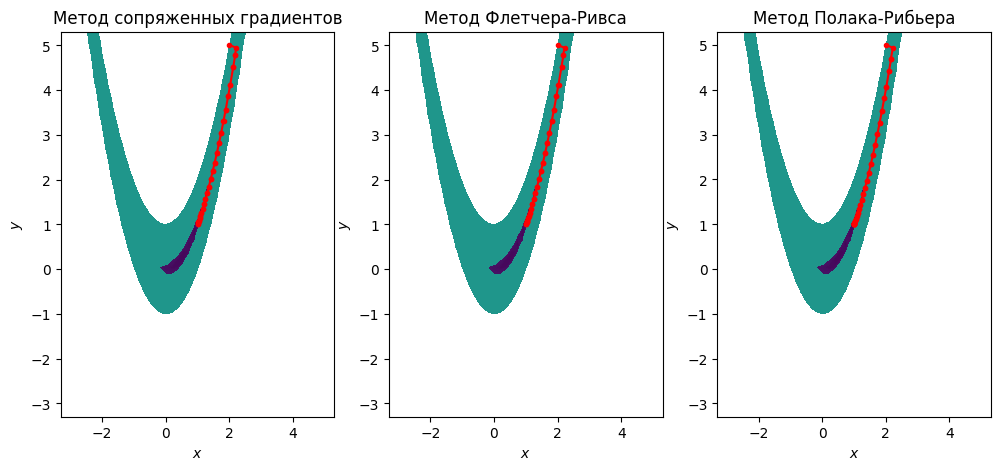

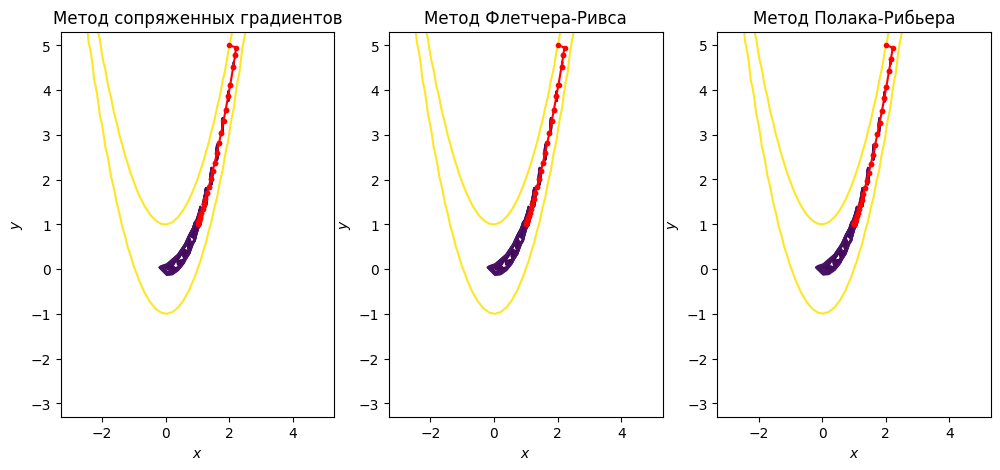

In [ ]:
from ast import While
from operator import mod
import numpy as np
import sympy as sp
import math
import matplotlib.pyplot as plt



# Параметры методов:
alpha = 30
eps = 0.001
X0 = np.array([2, 5])

# функция Розенброка
f = lambda x, y: alpha * (x**2 - y)**2 + (x - 1)**2


# Вычисление градиента:
x_sym, y_sym = sp.Symbol('x'), sp.Symbol('y')
Grad_f = sp.tensor.array.derive_by_array(f(x_sym, y_sym), [x_sym, y_sym])
Grad_f = sp.lambdify((x_sym, y_sym), Grad_f, 'numpy')



#Метод золотого сечения
def golden_ratio(phi, n, b = 0.5, a = 0, e = eps):
    tau = (math.sqrt(5) + 1) / 2
    Ak, Bk = a, b
    lk = Bk - Ak
    Xk1 = Ak + ((Bk - Ak) - (Bk - Ak) / tau)
    Xk2 = Ak + (Bk - Ak) / tau
    y1, y2 = phi(Xk1), phi(Xk2)
    n += 2
    while lk >= e/1000:
        if y1 >= y2:
            Ak = Xk1
            Xk1 = Xk2
            Xk2 = Ak + Bk - Xk1
            y1 = y2
            y2 = phi(Xk2)
            n +=1
        else:
            Bk = Xk2
            Xk2 = Xk1
            Xk1 = Ak + Bk - Xk2
            y2 = y1
            y1 = phi(Xk1)
            n +=1
        lk = Bk - Ak
    return (Ak + Bk) / 2, n


#Метод сопряженных градиентов
def conjugate_directions(method):
    w = lambda X: -np.array(Grad_f(X[0], X[1]))
    fun = lambda X: f(X[0], X[1])
    X = X0
    n = 0
    phi = lambda kappa: fun(X + kappa * p1)
    kappa_list, X_p, Y_p = np.empty(0), np.empty(0), np.empty(0)
    X_p = np.append(X_p, X[0])
    Y_p = np.append(Y_p, X[1])
    kappa_list = np.append(kappa_list, 0.1)
    p1 = w1 = w(X)
    g = i = 1   
    if np.linalg.norm(w1) < eps:
         return X, X_p, Y_p, i, n, g, kappa_list
    
    while (True):
        
        kappa, n = golden_ratio(phi, n) #находим каппу
        kappa_list = np.append(kappa_list, kappa)

        Xk = X + kappa * p1 #следующая точка
        w2 = w(Xk)
        g += 1
        if np.linalg.norm(w2) < eps:
            break

          
        # выбираем способ
        if method == 2:
            gamma = ((np.linalg.norm(w2))**2)/np.dot(w1, p1) #метод сопряженных градиентов
        elif method == 3:
            gamma = ((np.linalg.norm(w2))**2)/((np.linalg.norm(w1))**2) #метод Флетчера-Ривса
        elif method == 4:
            gamma = np.dot((w2-w1), w2)/((np.linalg.norm(w1))**2) #метод Полака-Рибьера  

        if i % 2 == 0:
            gamma = 0     

        p2 = gamma * p1 + w2
        w1 = w2
        p1 = p2
        X = Xk
        X_p = np.append(X_p, X[0])
        Y_p = np.append(Y_p, X[1])
        i += 1

    return X, X_p, Y_p, i, n, g, kappa_list



#Не очень картинки
def DrawSurfContourAndWk(X2, X3, X4, X2_p, Y2_p, X3_p, Y3_p, X4_p, Y4_p):
    fig = plt.figure(figsize =(12,5))
    #fig.canvas.manager.full_screen_toggle()

    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)
    
    fig.canvas.manager.set_window_title('Методы сопряженного градиента')


    delta = max(abs(X2[0] - X0[0]), abs(X2[1] - X0[1])) + 0.3
    X, Y = np.meshgrid(np.linspace(X2[0] - delta, X2[0] + delta, 50),
    np.linspace(X2[1] - delta, X2[1] + delta, 50))
    # X, Y = np.meshgrid(X_p1, Y_p1)
    Z = f(X, Y)
    axes1.contour(X, Y, Z, levels = Val(X2_p, Y2_p))
    axes1.plot(X2_p, Y2_p, marker='o', markersize=3, color='red')
    axes1.set_xlabel('$x$')
    axes1.set_ylabel('$y$')
    axes1.set_title('Метод сопряженных градиентов')

   
    delta = max(abs(X3[0] - X0[0]), abs(X3[1] - X0[1])) + 0.3
    X, Y = np.meshgrid(np.linspace(X3[0] - delta, X3[0] + delta, 50),
    np.linspace(X3[1] - delta, X3[1] + delta, 50))
    # X, Y = np.meshgrid(X_p1, Y_p1)
    Z = f(X, Y)
    axes2.contour(X, Y, Z, levels = Val(X3_p, Y3_p))
    axes2.plot(X3_p, Y3_p, marker='o', markersize=3, color='red')
    axes2.set_xlabel('$x$')
    axes2.set_ylabel('$y$')
    axes2.set_title('Метод Флетчера-Ривса')



    delta = max(abs(X4[0] - X0[0]), abs(X4[1] - X0[1])) + 0.3
    X, Y = np.meshgrid(np.linspace(X4[0] - delta, X4[0] + delta, 50),
    np.linspace(X4[1] - delta, X4[1] + delta, 50))
    #X, Y = np.meshgrid(X_p2, Y_p2)
    Z = f(X, Y)
    axes3.contour(X, Y, Z, levels = Val(X4_p, Y4_p))
    axes3.plot(X4_p, Y4_p, marker='o', markersize=3, color='red')
    axes3.set_xlabel('$x$')
    axes3.set_ylabel('$y$')
    axes3.set_title('Метод Полака-Рибьера')


#3D и линии уровня двух графиков
def DrawSurfContour(X2, X3, X4, X2_p, Y2_p, X3_p, Y3_p, X4_p, Y4_p):
    fig = plt.figure(figsize =(12,5))
    # fig.canvas.manager.full_screen_toggle()

    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)
    
    fig.canvas.manager.set_window_title('Методы сопряженного градиента')


    delta = max(abs(X2[0] - X0[0]), abs(X2[1] - X0[1])) + 0.3
    X, Y = np.meshgrid(np.linspace(X2[0] - delta, X2[0] + delta, 50),
    np.linspace(X2[1] - delta, X2[1] + delta, 50))
    # X, Y = np.meshgrid(X_p1, Y_p1)
    Z = f(X, Y)
    axes1.contourf(X, Y, Z, levels = Val(X2_p, Y2_p))
    axes1.plot(X2_p, Y2_p, marker='o', markersize=3, color='red')
    axes1.set_xlabel('$x$')
    axes1.set_ylabel('$y$')
    axes1.set_title('Метод сопряженных градиентов')
    

   
    delta = max(abs(X3[0] - X0[0]), abs(X3[1] - X0[1])) + 0.3
    X, Y = np.meshgrid(np.linspace(X3[0] - delta, X3[0] + delta, 50),
    np.linspace(X3[1] - delta, X3[1] + delta, 50))
    # X, Y = np.meshgrid(X_p1, Y_p1)
    Z = f(X, Y)
    axes2.contourf(X, Y, Z, levels = Val(X3_p, Y3_p))
    axes2.plot(X3_p, Y3_p, marker='o', markersize=3, color='red')
    axes2.set_xlabel('$x$')
    axes2.set_ylabel('$y$')
    axes2.set_title('Метод Флетчера-Ривса')
    


    delta = max(abs(X4[0] - X0[0]), abs(X4[1] - X0[1])) + 0.3
    X, Y = np.meshgrid(np.linspace(X4[0] - delta, X4[0] + delta, 50),
    np.linspace(X4[1] - delta, X4[1] + delta, 50))
    #X, Y = np.meshgrid(X_p2, Y_p2)
    Z = f(X, Y)
    axes3.contourf(X, Y, Z, levels = Val(X4_p, Y4_p))
    axes3.plot(X4_p, Y4_p, marker='o', markersize=3, color='red')
    axes3.set_xlabel('$x$')
    axes3.set_ylabel('$y$')
    axes3.set_title('Метод Полака-Рибьера')
    


#3D и линии уровня одного графика
def Draw(X_, X_p, Y_p, k):

    delta = max(abs(X_[0] - X0[0]), abs(X_[1] - X0[1])) + 1
    X, Y = np.meshgrid(np.linspace(X_[0] - delta, X_[0] + delta,  100),
    np.linspace(X_[1] - delta, X_[1] + delta, 100))
    Z = f(X, Y)


    #Angles needed for quiver plot
    anglesx = X_p[1:] - X_p[:-1]
    anglesy = Y_p[1:] - Y_p[:-1]

    fig = plt.figure(figsize = (16,8))

    if k == 1:
        fig.canvas.manager.set_window_title('Метод сопряженных направлений')
    elif k == 2:
        fig.canvas.manager.set_window_title('Метод сопряженных градиентов')
    elif k == 3:
        fig.canvas.manager.set_window_title('Метод Флетчера-Ривса')
    elif k == 4:
        fig.canvas.manager.set_window_title('Метод Полака-Рибьера')


    


    #Surface plot
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.plot_surface(X, Y, Z, rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
    ax.plot(X_p, Y_p, f(X_p,Y_p), color = 'r', marker = '*', alpha = .4)

    #ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor = 'none')
    ax.scatter(X0[0], X0[1], f(X0[0], X0[1]), s=20, marker='*', c='red', label='X0 - начальное приближение')
    ax.scatter(X_[0], X_[1], f(X_[0], X_[1]), s=20, marker='*', c='black', label='X - точка минимума')
    ax.legend(shadow = True, fontsize = 8)
    ax.view_init(15, 60)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')
    ax.set_title('Поверхность данной функции')


   
    #Contour plot
    ax = fig.add_subplot(1, 2, 2)
    ax.contourf(X, Y, Z, levels = Val(X_p, Y_p), cmap = 'jet')
    
    # Plotting the iterations and intermediate values
    ax.scatter(X_p, Y_p, color = 'r', marker = '*')
    ax.quiver(X_p[:-1], Y_p[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .3)
    


# Таблица точек и значений
def DrawPoints(X_p, Y_p, kappa_):
    for x in range(len(X_p)):
        #print('X = [','%.3f' % X_p[x], ' ','%.3f' % Y_p[x],']','\tf = ','%.3f' % f(X_p[x],Y_p[x]),'\tkappa = ','%.3f' % kappa_[x])
        print('X = [', np.round(X_p[x],6), ' ',np.round(Y_p[x],6),']\t',np.round(f(X_p[x],Y_p[x]),6),'\tkappa = ',np.round(kappa_[x],6))

    print()

# Значения функции
def Val(X_p, Y_p):
    Value = []
    for i in range(len(X_p)):
        Value.insert(0, f(X_p[i],Y_p[i]))
    return Value


def DrawValue(X_p, Y_p):
    for x in Val(X_p,Y_p):
        print('Value = ', np.round(x,6))

    print()

##############################################################################################################################################################################
##############################################################################################################################################################################
##############################################################################################################################################################################


print(" " * 20,' Методы сопряженных градиентов')
print('Дано:')
print('Целевая функция:        f(x, y) = ', f(x_sym, y_sym))
print('Начальное приближение:  X = ', X0)
print('Точность вычисления:    Eps = ', eps)


var = 0

if var == 2:
    X2, X2_p, Y2_p, i2, n2, g2, kappa_2 = conjugate_directions(2)
    print('X = ', X2)
    print('f = ', f(X2[0],X2[1]))
    print('i = ', i2)
    print('n = ', n2)
    print('g = ', g2)
    #DrawPoints(X2_p, Y2_p, kappa_2) # таблица точек и значений 3
    #DrawValue(X2_p, Y2_p)
    Draw(X2, X2_p, Y2_p, 2)
elif var == 3:
    X3, X3_p, Y3_p, i3, n3, g3, kappa_3 = conjugate_directions(3)
    print('X = ', X3)
    print('f = ', f(X3[0],X3[1]))
    print('i = ', i3)
    print('n = ', n3)
    print('g = ', g3)
    #DrawPoints(X3_p, Y3_p, kappa_3) # таблица точек и значений 3
    #DrawValue(X3_p, Y3_p)
    Draw(X3, X3_p, Y3_p, 3)
elif var == 4:
    X4, X4_p, Y4_p, i4, n4, g4, kappa_4 = conjugate_directions(4)
    print('X = ', np.round(X4, 6))
    print('f = ', np.round(f(X4[0], X4[1]),6))
    print('i = ', i4)
    print('n = ', n4)
    print('g = ', g4)
    #DrawPoints(X4_p, Y4_p, kappa_4) # таблица точек и значений 4
    #DrawValue(X4_p, Y4_p)
    Draw(X4, X4_p, Y4_p, 4)
elif var == 0:
    X2, X2_p, Y2_p, i2, n2, g2, kappa_2 = conjugate_directions(2)
    X3, X3_p, Y3_p, i3, n3, g3, kappa_3 = conjugate_directions(3)
    X4, X4_p, Y4_p, i4, n4, g4, kappa_4 = conjugate_directions(4)
    print()
    print('**********************************************************************************************************************************************************************')
    print('Методы\t\t\t', '    МСГ\t\t\t', '    Флетчера-Ривса\t\t\t', '    Полака-Рибьера')
    print('Xmin  \t\t',  X2,'\t\t', X3,'\t', X4)
    print('f(Xmin)\t\t', f(X2[0], X2[1]),'\t\t\t', f(X3[0],X3[1]),'\t\t\t', f(X4[0], X4[1]))
    print('i\t\t\t', i2,'\t\t\t\t\t',i3,'\t\t\t\t\t',i4)
    print('n\t\t\t', n2,'\t\t\t\t\t',n3,'\t\t\t\t\t',n4)
    print('g\t\t\t', g2,'\t\t\t\t\t',g3,'\t\t\t\t\t',g4)
    print('**********************************************************************************************************************************************************************')
    DrawSurfContour(X2, X3, X4, X2_p, Y2_p, X3_p, Y3_p, X4_p, Y4_p)
    DrawSurfContourAndWk(X2, X3, X4, X2_p, Y2_p, X3_p, Y3_p, X4_p, Y4_p)

elif var == 234:
    X2, X2_p, Y2_p, i2, n2, g2, kappa_2 = conjugate_directions(2)
    X3, X3_p, Y3_p, i3, n3, g3, kappa_3 = conjugate_directions(3)
    X4, X4_p, Y4_p, i4, n4, g4, kappa_4 = conjugate_directions(4)
    print()
    print('**********************************************************************************************************************************************************************')
    print('Методы\t\t\t', '    МСГ\t\t\t', '    Флетчера-Ривса\t\t\t', '    Полака-Рибьера')
    print('Xmin  \t\t',  X2,'\t\t', X3,'\t', X4)
    print('f(Xmin)\t\t', f(X2[0], X2[1]),'\t\t\t', f(X3[0],X3[1]),'\t\t\t', f(X4[0], X4[1]))
    print('i\t\t\t', i2,'\t\t\t\t\t',i3,'\t\t\t\t\t',i4)
    print('n\t\t\t', n2,'\t\t\t\t\t',n3,'\t\t\t\t\t',n4)
    print('g\t\t\t', g2,'\t\t\t\t\t',g3,'\t\t\t\t\t',g4)
    print('**********************************************************************************************************************************************************************')
    DrawPoints(X2_p, Y2_p, kappa_2) # таблица точек и значений 3
    Draw(X2, X2_p, Y2_p, 2)
    DrawPoints(X3_p, Y3_p, kappa_3) # таблица точек и значений
    Draw(X3, X3_p, Y3_p, 3)
    DrawPoints(X4_p, Y4_p, kappa_4) # таблица точек и значений
    Draw(X4, X4_p, Y4_p, 4)






plt.show()





                      Методы сопряженных градиентов
Дано:
Целевая функция:        f(x, y) =  (x - 1)**2 + 30*(x**2 - y)**2
Начальное приближение:  X =  [2 5]
Точность вычисления:    Eps =  1e-06

**********************************************************************************************************************************************************************
Методы			     МСГ			     Флетчера-Ривса			     Полака-Рибьера
Xmin  		 [1.00008031 1.00015537] 		 [1.00008031 1.00015537] 	 [1.00000109 1.00000219]
f(Xmin)		 7.281384545140922e-09 			 7.281384545140922e-09 			 1.1883860762458672e-12
i			 58 					 58 					 64
n			 2468 					 2468 					 2721
g			 59 					 59 					 65
**********************************************************************************************************************************************************************


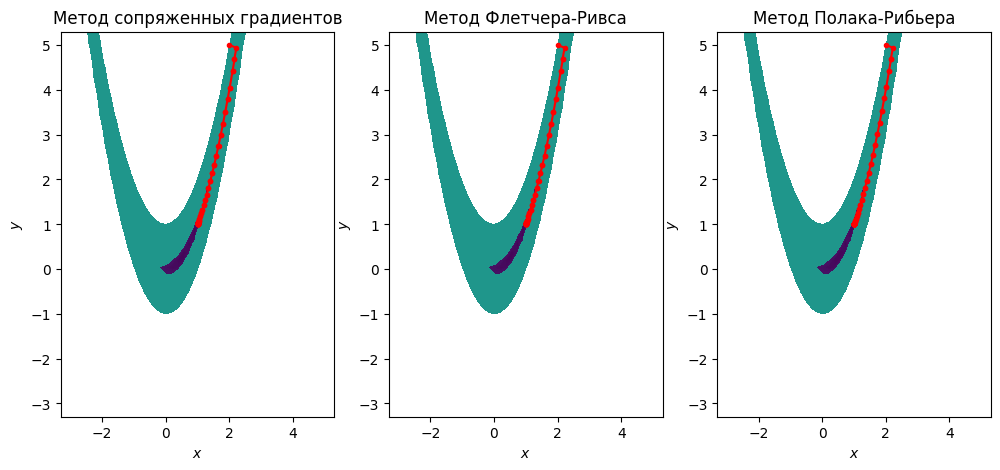

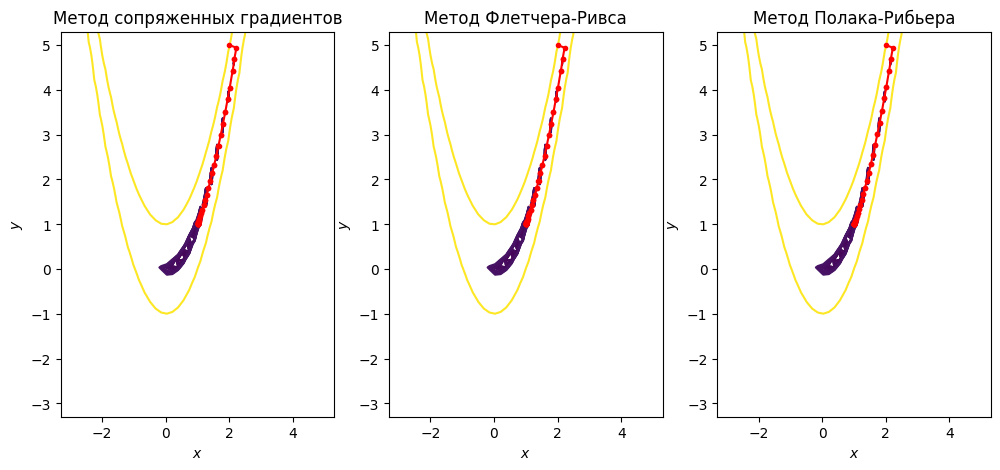

In [ ]:
from ast import While
from operator import mod
import numpy as np
import sympy as sp
import math
import matplotlib.pyplot as plt



# Параметры методов:
alpha = 30
eps = 0.000001
X0 = np.array([2, 5])

# функция Розенброка
f = lambda x, y: alpha * (x**2 - y)**2 + (x - 1)**2


# Вычисление градиента:
x_sym, y_sym = sp.Symbol('x'), sp.Symbol('y')
Grad_f = sp.tensor.array.derive_by_array(f(x_sym, y_sym), [x_sym, y_sym])
Grad_f = sp.lambdify((x_sym, y_sym), Grad_f, 'numpy')



#Метод золотого сечения
def golden_ratio(phi, n, b = 0.5, a = 0, e = eps):
    tau = (math.sqrt(5) + 1) / 2
    Ak, Bk = a, b
    lk = Bk - Ak
    Xk1 = Ak + ((Bk - Ak) - (Bk - Ak) / tau)
    Xk2 = Ak + (Bk - Ak) / tau
    y1, y2 = phi(Xk1), phi(Xk2)
    n += 2
    while lk >= e/1000:
        if y1 >= y2:
            Ak = Xk1
            Xk1 = Xk2
            Xk2 = Ak + Bk - Xk1
            y1 = y2
            y2 = phi(Xk2)
            n +=1
        else:
            Bk = Xk2
            Xk2 = Xk1
            Xk1 = Ak + Bk - Xk2
            y2 = y1
            y1 = phi(Xk1)
            n +=1
        lk = Bk - Ak
    return (Ak + Bk) / 2, n


#Метод сопряженных градиентов
def conjugate_directions(method):
    w = lambda X: -np.array(Grad_f(X[0], X[1]))
    fun = lambda X: f(X[0], X[1])
    X = X0
    n = 0
    phi = lambda kappa: fun(X + kappa * p1)
    kappa_list, X_p, Y_p = np.empty(0), np.empty(0), np.empty(0)
    X_p = np.append(X_p, X[0])
    Y_p = np.append(Y_p, X[1])
    kappa_list = np.append(kappa_list, 0.1)
    p1 = w1 = w(X)
    g = i = 1   
    if np.linalg.norm(w1) < eps:
         return X, X_p, Y_p, i, n, g, kappa_list
    
    while (True):
        
        kappa, n = golden_ratio(phi, n) #находим каппу
        kappa_list = np.append(kappa_list, kappa)

        Xk = X + kappa * p1 #следующая точка
        w2 = w(Xk)
        g += 1
        if np.linalg.norm(w2) < eps:
            break

          
        # выбираем способ
        if method == 2:
            gamma = ((np.linalg.norm(w2))**2)/np.dot(w1, p1) #метод сопряженных градиентов
        elif method == 3:
            gamma = ((np.linalg.norm(w2))**2)/((np.linalg.norm(w1))**2) #метод Флетчера-Ривса
        elif method == 4:
            gamma = np.dot((w2-w1), w2)/((np.linalg.norm(w1))**2) #метод Полака-Рибьера  

        if i % 2 == 0:
            gamma = 0     

        p2 = gamma * p1 + w2
        w1 = w2
        p1 = p2
        X = Xk
        X_p = np.append(X_p, X[0])
        Y_p = np.append(Y_p, X[1])
        i += 1

    return X, X_p, Y_p, i, n, g, kappa_list



#Не очень картинки
def DrawSurfContourAndWk(X2, X3, X4, X2_p, Y2_p, X3_p, Y3_p, X4_p, Y4_p):
    fig = plt.figure(figsize =(12,5))
    #fig.canvas.manager.full_screen_toggle()

    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)
    
    fig.canvas.manager.set_window_title('Методы сопряженного градиента')


    delta = max(abs(X2[0] - X0[0]), abs(X2[1] - X0[1])) + 0.3
    X, Y = np.meshgrid(np.linspace(X2[0] - delta, X2[0] + delta, 50),
    np.linspace(X2[1] - delta, X2[1] + delta, 50))
    # X, Y = np.meshgrid(X_p1, Y_p1)
    Z = f(X, Y)
    axes1.contour(X, Y, Z, levels = Val(X2_p, Y2_p))
    axes1.plot(X2_p, Y2_p, marker='o', markersize=3, color='red')
    axes1.set_xlabel('$x$')
    axes1.set_ylabel('$y$')
    axes1.set_title('Метод сопряженных градиентов')

   
    delta = max(abs(X3[0] - X0[0]), abs(X3[1] - X0[1])) + 0.3
    X, Y = np.meshgrid(np.linspace(X3[0] - delta, X3[0] + delta, 50),
    np.linspace(X3[1] - delta, X3[1] + delta, 50))
    # X, Y = np.meshgrid(X_p1, Y_p1)
    Z = f(X, Y)
    axes2.contour(X, Y, Z, levels = Val(X3_p, Y3_p))
    axes2.plot(X3_p, Y3_p, marker='o', markersize=3, color='red')
    axes2.set_xlabel('$x$')
    axes2.set_ylabel('$y$')
    axes2.set_title('Метод Флетчера-Ривса')



    delta = max(abs(X4[0] - X0[0]), abs(X4[1] - X0[1])) + 0.3
    X, Y = np.meshgrid(np.linspace(X4[0] - delta, X4[0] + delta, 50),
    np.linspace(X4[1] - delta, X4[1] + delta, 50))
    #X, Y = np.meshgrid(X_p2, Y_p2)
    Z = f(X, Y)
    axes3.contour(X, Y, Z, levels = Val(X4_p, Y4_p))
    axes3.plot(X4_p, Y4_p, marker='o', markersize=3, color='red')
    axes3.set_xlabel('$x$')
    axes3.set_ylabel('$y$')
    axes3.set_title('Метод Полака-Рибьера')


#3D и линии уровня двух графиков
def DrawSurfContour(X2, X3, X4, X2_p, Y2_p, X3_p, Y3_p, X4_p, Y4_p):
    fig = plt.figure(figsize =(12,5))
    # fig.canvas.manager.full_screen_toggle()

    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)
    
    fig.canvas.manager.set_window_title('Методы сопряженного градиента')


    delta = max(abs(X2[0] - X0[0]), abs(X2[1] - X0[1])) + 0.3
    X, Y = np.meshgrid(np.linspace(X2[0] - delta, X2[0] + delta, 50),
    np.linspace(X2[1] - delta, X2[1] + delta, 50))
    # X, Y = np.meshgrid(X_p1, Y_p1)
    Z = f(X, Y)
    axes1.contourf(X, Y, Z, levels = Val(X2_p, Y2_p))
    axes1.plot(X2_p, Y2_p, marker='o', markersize=3, color='red')
    axes1.set_xlabel('$x$')
    axes1.set_ylabel('$y$')
    axes1.set_title('Метод сопряженных градиентов')
    

   
    delta = max(abs(X3[0] - X0[0]), abs(X3[1] - X0[1])) + 0.3
    X, Y = np.meshgrid(np.linspace(X3[0] - delta, X3[0] + delta, 50),
    np.linspace(X3[1] - delta, X3[1] + delta, 50))
    # X, Y = np.meshgrid(X_p1, Y_p1)
    Z = f(X, Y)
    axes2.contourf(X, Y, Z, levels = Val(X3_p, Y3_p))
    axes2.plot(X3_p, Y3_p, marker='o', markersize=3, color='red')
    axes2.set_xlabel('$x$')
    axes2.set_ylabel('$y$')
    axes2.set_title('Метод Флетчера-Ривса')
    


    delta = max(abs(X4[0] - X0[0]), abs(X4[1] - X0[1])) + 0.3
    X, Y = np.meshgrid(np.linspace(X4[0] - delta, X4[0] + delta, 50),
    np.linspace(X4[1] - delta, X4[1] + delta, 50))
    #X, Y = np.meshgrid(X_p2, Y_p2)
    Z = f(X, Y)
    axes3.contourf(X, Y, Z, levels = Val(X4_p, Y4_p))
    axes3.plot(X4_p, Y4_p, marker='o', markersize=3, color='red')
    axes3.set_xlabel('$x$')
    axes3.set_ylabel('$y$')
    axes3.set_title('Метод Полака-Рибьера')
    


#3D и линии уровня одного графика
def Draw(X_, X_p, Y_p, k):

    delta = max(abs(X_[0] - X0[0]), abs(X_[1] - X0[1])) + 1
    X, Y = np.meshgrid(np.linspace(X_[0] - delta, X_[0] + delta,  100),
    np.linspace(X_[1] - delta, X_[1] + delta, 100))
    Z = f(X, Y)


    #Angles needed for quiver plot
    anglesx = X_p[1:] - X_p[:-1]
    anglesy = Y_p[1:] - Y_p[:-1]

    fig = plt.figure(figsize = (16,8))

    if k == 1:
        fig.canvas.manager.set_window_title('Метод сопряженных направлений')
    elif k == 2:
        fig.canvas.manager.set_window_title('Метод сопряженных градиентов')
    elif k == 3:
        fig.canvas.manager.set_window_title('Метод Флетчера-Ривса')
    elif k == 4:
        fig.canvas.manager.set_window_title('Метод Полака-Рибьера')


    


    #Surface plot
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.plot_surface(X, Y, Z, rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
    ax.plot(X_p, Y_p, f(X_p,Y_p), color = 'r', marker = '*', alpha = .4)

    #ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor = 'none')
    ax.scatter(X0[0], X0[1], f(X0[0], X0[1]), s=20, marker='*', c='red', label='X0 - начальное приближение')
    ax.scatter(X_[0], X_[1], f(X_[0], X_[1]), s=20, marker='*', c='black', label='X - точка минимума')
    ax.legend(shadow = True, fontsize = 8)
    ax.view_init(15, 60)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')
    ax.set_title('Поверхность данной функции')


   
    #Contour plot
    ax = fig.add_subplot(1, 2, 2)
    ax.contourf(X, Y, Z, levels = Val(X_p, Y_p), cmap = 'jet')
    
    # Plotting the iterations and intermediate values
    ax.scatter(X_p, Y_p, color = 'r', marker = '*')
    ax.quiver(X_p[:-1], Y_p[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .3)
    


# Таблица точек и значений
def DrawPoints(X_p, Y_p, kappa_):
    for x in range(len(X_p)):
        #print('X = [','%.3f' % X_p[x], ' ','%.3f' % Y_p[x],']','\tf = ','%.3f' % f(X_p[x],Y_p[x]),'\tkappa = ','%.3f' % kappa_[x])
        print('X = [', np.round(X_p[x],6), ' ',np.round(Y_p[x],6),']\t',np.round(f(X_p[x],Y_p[x]),6),'\tkappa = ',np.round(kappa_[x],6))

    print()

# Значения функции
def Val(X_p, Y_p):
    Value = []
    for i in range(len(X_p)):
        Value.insert(0, f(X_p[i],Y_p[i]))
    return Value


def DrawValue(X_p, Y_p):
    for x in Val(X_p,Y_p):
        print('Value = ', np.round(x,6))

    print()

##############################################################################################################################################################################
##############################################################################################################################################################################
##############################################################################################################################################################################


print(" " * 20,' Методы сопряженных градиентов')
print('Дано:')
print('Целевая функция:        f(x, y) = ', f(x_sym, y_sym))
print('Начальное приближение:  X = ', X0)
print('Точность вычисления:    Eps = ', eps)


var = 0

if var == 2:
    X2, X2_p, Y2_p, i2, n2, g2, kappa_2 = conjugate_directions(2)
    print('X = ', X2)
    print('f = ', f(X2[0],X2[1]))
    print('i = ', i2)
    print('n = ', n2)
    print('g = ', g2)
    #DrawPoints(X2_p, Y2_p, kappa_2) # таблица точек и значений 3
    #DrawValue(X2_p, Y2_p)
    Draw(X2, X2_p, Y2_p, 2)
elif var == 3:
    X3, X3_p, Y3_p, i3, n3, g3, kappa_3 = conjugate_directions(3)
    print('X = ', X3)
    print('f = ', f(X3[0],X3[1]))
    print('i = ', i3)
    print('n = ', n3)
    print('g = ', g3)
    #DrawPoints(X3_p, Y3_p, kappa_3) # таблица точек и значений 3
    #DrawValue(X3_p, Y3_p)
    Draw(X3, X3_p, Y3_p, 3)
elif var == 4:
    X4, X4_p, Y4_p, i4, n4, g4, kappa_4 = conjugate_directions(4)
    print('X = ', np.round(X4, 6))
    print('f = ', np.round(f(X4[0], X4[1]),6))
    print('i = ', i4)
    print('n = ', n4)
    print('g = ', g4)
    #DrawPoints(X4_p, Y4_p, kappa_4) # таблица точек и значений 4
    #DrawValue(X4_p, Y4_p)
    Draw(X4, X4_p, Y4_p, 4)
elif var == 0:
    X2, X2_p, Y2_p, i2, n2, g2, kappa_2 = conjugate_directions(2)
    X3, X3_p, Y3_p, i3, n3, g3, kappa_3 = conjugate_directions(3)
    X4, X4_p, Y4_p, i4, n4, g4, kappa_4 = conjugate_directions(4)
    print()
    print('**********************************************************************************************************************************************************************')
    print('Методы\t\t\t', '    МСГ\t\t\t', '    Флетчера-Ривса\t\t\t', '    Полака-Рибьера')
    print('Xmin  \t\t',  X2,'\t\t', X3,'\t', X4)
    print('f(Xmin)\t\t', f(X2[0], X2[1]),'\t\t\t', f(X3[0],X3[1]),'\t\t\t', f(X4[0], X4[1]))
    print('i\t\t\t', i2,'\t\t\t\t\t',i3,'\t\t\t\t\t',i4)
    print('n\t\t\t', n2,'\t\t\t\t\t',n3,'\t\t\t\t\t',n4)
    print('g\t\t\t', g2,'\t\t\t\t\t',g3,'\t\t\t\t\t',g4)
    print('**********************************************************************************************************************************************************************')
    DrawSurfContour(X2, X3, X4, X2_p, Y2_p, X3_p, Y3_p, X4_p, Y4_p)
    DrawSurfContourAndWk(X2, X3, X4, X2_p, Y2_p, X3_p, Y3_p, X4_p, Y4_p)

elif var == 234:
    X2, X2_p, Y2_p, i2, n2, g2, kappa_2 = conjugate_directions(2)
    X3, X3_p, Y3_p, i3, n3, g3, kappa_3 = conjugate_directions(3)
    X4, X4_p, Y4_p, i4, n4, g4, kappa_4 = conjugate_directions(4)
    print()
    print('**********************************************************************************************************************************************************************')
    print('Методы\t\t\t', '    МСГ\t\t\t', '    Флетчера-Ривса\t\t\t', '    Полака-Рибьера')
    print('Xmin  \t\t',  X2,'\t\t', X3,'\t', X4)
    print('f(Xmin)\t\t', f(X2[0], X2[1]),'\t\t\t', f(X3[0],X3[1]),'\t\t\t', f(X4[0], X4[1]))
    print('i\t\t\t', i2,'\t\t\t\t\t',i3,'\t\t\t\t\t',i4)
    print('n\t\t\t', n2,'\t\t\t\t\t',n3,'\t\t\t\t\t',n4)
    print('g\t\t\t', g2,'\t\t\t\t\t',g3,'\t\t\t\t\t',g4)
    print('**********************************************************************************************************************************************************************')
    DrawPoints(X2_p, Y2_p, kappa_2) # таблица точек и значений 3
    Draw(X2, X2_p, Y2_p, 2)
    DrawPoints(X3_p, Y3_p, kappa_3) # таблица точек и значений
    Draw(X3, X3_p, Y3_p, 3)
    DrawPoints(X4_p, Y4_p, kappa_4) # таблица точек и значений
    Draw(X4, X4_p, Y4_p, 4)




plt.show()





                      Методы сопряженных градиентов
Дано:
Целевая функция:        f(x, y) =  (x - 1)**2 + 30*(x**2 - y)**2
Начальное приближение:  X =  [-2 10]
Точность вычисления:    Eps =  0.001

**********************************************************************************************************************************************************************
Методы			     МСГ			     Флетчера-Ривса			     Полака-Рибьера
Xmin  		 [1.00120267 1.0018782 ] 		 [1.00120267 1.0018782 ] 	 [0.99999408 0.99996795]
f(Xmin)		 9.828219006438437e-06 			 9.828219006438437e-06 			 1.2286948839955922e-08
i			 59 					 59 					 65
n			 1770 					 1770 					 1950
g			 60 					 60 					 66
**********************************************************************************************************************************************************************


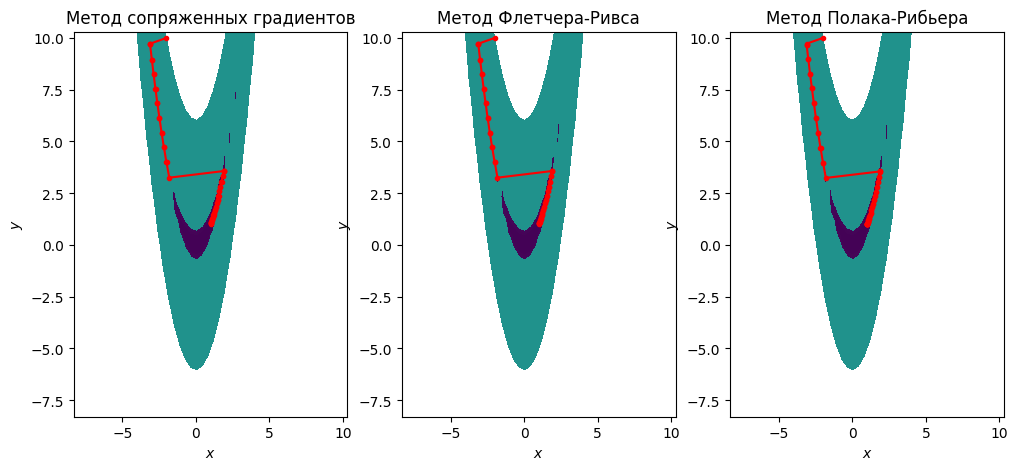

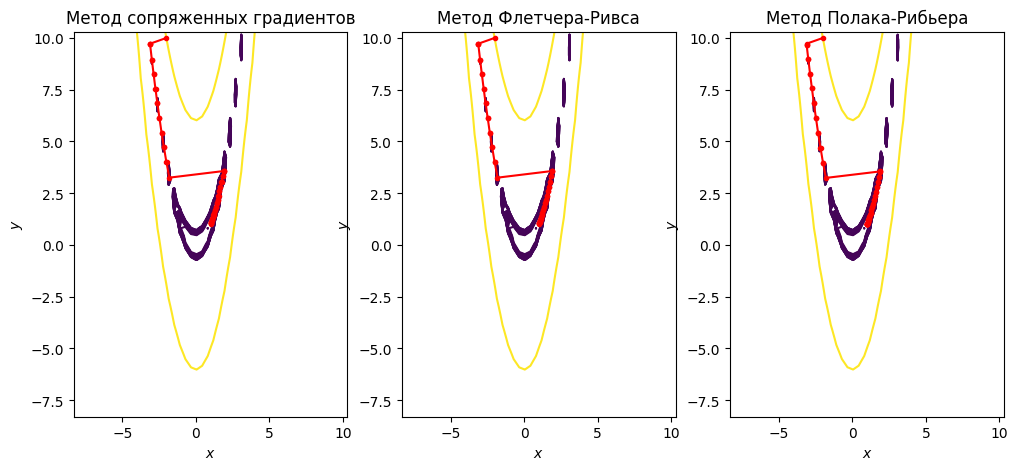

In [ ]:
from ast import While
from operator import mod
import numpy as np
import sympy as sp
import math
import matplotlib.pyplot as plt



# Параметры методов:
alpha = 30
eps = 0.001
X0 = np.array([-2, 10])

# функция Розенброка
f = lambda x, y: alpha * (x**2 - y)**2 + (x - 1)**2


# Вычисление градиента:
x_sym, y_sym = sp.Symbol('x'), sp.Symbol('y')
Grad_f = sp.tensor.array.derive_by_array(f(x_sym, y_sym), [x_sym, y_sym])
Grad_f = sp.lambdify((x_sym, y_sym), Grad_f, 'numpy')



#Метод золотого сечения
def golden_ratio(phi, n, b = 0.5, a = 0, e = eps):
    tau = (math.sqrt(5) + 1) / 2
    Ak, Bk = a, b
    lk = Bk - Ak
    Xk1 = Ak + ((Bk - Ak) - (Bk - Ak) / tau)
    Xk2 = Ak + (Bk - Ak) / tau
    y1, y2 = phi(Xk1), phi(Xk2)
    n += 2
    while lk >= e/1000:
        if y1 >= y2:
            Ak = Xk1
            Xk1 = Xk2
            Xk2 = Ak + Bk - Xk1
            y1 = y2
            y2 = phi(Xk2)
            n +=1
        else:
            Bk = Xk2
            Xk2 = Xk1
            Xk1 = Ak + Bk - Xk2
            y2 = y1
            y1 = phi(Xk1)
            n +=1
        lk = Bk - Ak
    return (Ak + Bk) / 2, n


#Метод сопряженных градиентов
def conjugate_directions(method):
    w = lambda X: -np.array(Grad_f(X[0], X[1]))
    fun = lambda X: f(X[0], X[1])
    X = X0
    n = 0
    phi = lambda kappa: fun(X + kappa * p1)
    kappa_list, X_p, Y_p = np.empty(0), np.empty(0), np.empty(0)
    X_p = np.append(X_p, X[0])
    Y_p = np.append(Y_p, X[1])
    kappa_list = np.append(kappa_list, 0.1)
    p1 = w1 = w(X)
    g = i = 1   
    if np.linalg.norm(w1) < eps:
         return X, X_p, Y_p, i, n, g, kappa_list
    
    while (True):
        
        kappa, n = golden_ratio(phi, n) #находим каппу
        kappa_list = np.append(kappa_list, kappa)

        Xk = X + kappa * p1 #следующая точка
        w2 = w(Xk)
        g += 1
        if np.linalg.norm(w2) < eps:
            break

          
        # выбираем способ
        if method == 2:
            gamma = ((np.linalg.norm(w2))**2)/np.dot(w1, p1) #метод сопряженных градиентов
        elif method == 3:
            gamma = ((np.linalg.norm(w2))**2)/((np.linalg.norm(w1))**2) #метод Флетчера-Ривса
        elif method == 4:
            gamma = np.dot((w2-w1), w2)/((np.linalg.norm(w1))**2) #метод Полака-Рибьера  

        if i % 2 == 0:
            gamma = 0     

        p2 = gamma * p1 + w2
        w1 = w2
        p1 = p2
        X = Xk
        X_p = np.append(X_p, X[0])
        Y_p = np.append(Y_p, X[1])
        i += 1

    return X, X_p, Y_p, i, n, g, kappa_list



#Не очень картинки
def DrawSurfContourAndWk(X2, X3, X4, X2_p, Y2_p, X3_p, Y3_p, X4_p, Y4_p):
    fig = plt.figure(figsize =(12,5))
    #fig.canvas.manager.full_screen_toggle()

    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)
    
    fig.canvas.manager.set_window_title('Методы сопряженного градиента')


    delta = max(abs(X2[0] - X0[0]), abs(X2[1] - X0[1])) + 0.3
    X, Y = np.meshgrid(np.linspace(X2[0] - delta, X2[0] + delta, 50),
    np.linspace(X2[1] - delta, X2[1] + delta, 50))
    # X, Y = np.meshgrid(X_p1, Y_p1)
    Z = f(X, Y)
    axes1.contour(X, Y, Z, levels = Val(X2_p, Y2_p))
    axes1.plot(X2_p, Y2_p, marker='o', markersize=3, color='red')
    axes1.set_xlabel('$x$')
    axes1.set_ylabel('$y$')
    axes1.set_title('Метод сопряженных градиентов')

   
    delta = max(abs(X3[0] - X0[0]), abs(X3[1] - X0[1])) + 0.3
    X, Y = np.meshgrid(np.linspace(X3[0] - delta, X3[0] + delta, 50),
    np.linspace(X3[1] - delta, X3[1] + delta, 50))
    # X, Y = np.meshgrid(X_p1, Y_p1)
    Z = f(X, Y)
    axes2.contour(X, Y, Z, levels = Val(X3_p, Y3_p))
    axes2.plot(X3_p, Y3_p, marker='o', markersize=3, color='red')
    axes2.set_xlabel('$x$')
    axes2.set_ylabel('$y$')
    axes2.set_title('Метод Флетчера-Ривса')



    delta = max(abs(X4[0] - X0[0]), abs(X4[1] - X0[1])) + 0.3
    X, Y = np.meshgrid(np.linspace(X4[0] - delta, X4[0] + delta, 50),
    np.linspace(X4[1] - delta, X4[1] + delta, 50))
    #X, Y = np.meshgrid(X_p2, Y_p2)
    Z = f(X, Y)
    axes3.contour(X, Y, Z, levels = Val(X4_p, Y4_p))
    axes3.plot(X4_p, Y4_p, marker='o', markersize=3, color='red')
    axes3.set_xlabel('$x$')
    axes3.set_ylabel('$y$')
    axes3.set_title('Метод Полака-Рибьера')


#3D и линии уровня двух графиков
def DrawSurfContour(X2, X3, X4, X2_p, Y2_p, X3_p, Y3_p, X4_p, Y4_p):
    fig = plt.figure(figsize =(12,5))
    # fig.canvas.manager.full_screen_toggle()

    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)
    
    fig.canvas.manager.set_window_title('Методы сопряженного градиента')


    delta = max(abs(X2[0] - X0[0]), abs(X2[1] - X0[1])) + 0.3
    X, Y = np.meshgrid(np.linspace(X2[0] - delta, X2[0] + delta, 50),
    np.linspace(X2[1] - delta, X2[1] + delta, 50))
    # X, Y = np.meshgrid(X_p1, Y_p1)
    Z = f(X, Y)
    axes1.contourf(X, Y, Z, levels = Val(X2_p, Y2_p))
    axes1.plot(X2_p, Y2_p, marker='o', markersize=3, color='red')
    axes1.set_xlabel('$x$')
    axes1.set_ylabel('$y$')
    axes1.set_title('Метод сопряженных градиентов')
    

   
    delta = max(abs(X3[0] - X0[0]), abs(X3[1] - X0[1])) + 0.3
    X, Y = np.meshgrid(np.linspace(X3[0] - delta, X3[0] + delta, 50),
    np.linspace(X3[1] - delta, X3[1] + delta, 50))
    # X, Y = np.meshgrid(X_p1, Y_p1)
    Z = f(X, Y)
    axes2.contourf(X, Y, Z, levels = Val(X3_p, Y3_p))
    axes2.plot(X3_p, Y3_p, marker='o', markersize=3, color='red')
    axes2.set_xlabel('$x$')
    axes2.set_ylabel('$y$')
    axes2.set_title('Метод Флетчера-Ривса')
    


    delta = max(abs(X4[0] - X0[0]), abs(X4[1] - X0[1])) + 0.3
    X, Y = np.meshgrid(np.linspace(X4[0] - delta, X4[0] + delta, 50),
    np.linspace(X4[1] - delta, X4[1] + delta, 50))
    #X, Y = np.meshgrid(X_p2, Y_p2)
    Z = f(X, Y)
    axes3.contourf(X, Y, Z, levels = Val(X4_p, Y4_p))
    axes3.plot(X4_p, Y4_p, marker='o', markersize=3, color='red')
    axes3.set_xlabel('$x$')
    axes3.set_ylabel('$y$')
    axes3.set_title('Метод Полака-Рибьера')
    


#3D и линии уровня одного графика
def Draw(X_, X_p, Y_p, k):

    delta = max(abs(X_[0] - X0[0]), abs(X_[1] - X0[1])) + 1
    X, Y = np.meshgrid(np.linspace(X_[0] - delta, X_[0] + delta,  100),
    np.linspace(X_[1] - delta, X_[1] + delta, 100))
    Z = f(X, Y)


    #Angles needed for quiver plot
    anglesx = X_p[1:] - X_p[:-1]
    anglesy = Y_p[1:] - Y_p[:-1]

    fig = plt.figure(figsize = (16,8))

    if k == 1:
        fig.canvas.manager.set_window_title('Метод сопряженных направлений')
    elif k == 2:
        fig.canvas.manager.set_window_title('Метод сопряженных градиентов')
    elif k == 3:
        fig.canvas.manager.set_window_title('Метод Флетчера-Ривса')
    elif k == 4:
        fig.canvas.manager.set_window_title('Метод Полака-Рибьера')


    


    #Surface plot
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.plot_surface(X, Y, Z, rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
    ax.plot(X_p, Y_p, f(X_p,Y_p), color = 'r', marker = '*', alpha = .4)

    #ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor = 'none')
    ax.scatter(X0[0], X0[1], f(X0[0], X0[1]), s=20, marker='*', c='red', label='X0 - начальное приближение')
    ax.scatter(X_[0], X_[1], f(X_[0], X_[1]), s=20, marker='*', c='black', label='X - точка минимума')
    ax.legend(shadow = True, fontsize = 8)
    ax.view_init(15, 60)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')
    ax.set_title('Поверхность данной функции')


   
    #Contour plot
    ax = fig.add_subplot(1, 2, 2)
    ax.contourf(X, Y, Z, levels = Val(X_p, Y_p), cmap = 'jet')
    
    # Plotting the iterations and intermediate values
    ax.scatter(X_p, Y_p, color = 'r', marker = '*')
    ax.quiver(X_p[:-1], Y_p[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .3)
    


# Таблица точек и значений
def DrawPoints(X_p, Y_p, kappa_):
    for x in range(len(X_p)):
        #print('X = [','%.3f' % X_p[x], ' ','%.3f' % Y_p[x],']','\tf = ','%.3f' % f(X_p[x],Y_p[x]),'\tkappa = ','%.3f' % kappa_[x])
        print('X = [', np.round(X_p[x],6), ' ',np.round(Y_p[x],6),']\t',np.round(f(X_p[x],Y_p[x]),6),'\tkappa = ',np.round(kappa_[x],6))

    print()

# Значения функции
def Val(X_p, Y_p):
    Value = []
    for i in range(len(X_p)):
        Value.insert(0, f(X_p[i],Y_p[i]))
    return Value


def DrawValue(X_p, Y_p):
    for x in Val(X_p,Y_p):
        print('Value = ', np.round(x,6))

    print()

##############################################################################################################################################################################
##############################################################################################################################################################################
##############################################################################################################################################################################


print(" " * 20,' Методы сопряженных градиентов')
print('Дано:')
print('Целевая функция:        f(x, y) = ', f(x_sym, y_sym))
print('Начальное приближение:  X = ', X0)
print('Точность вычисления:    Eps = ', eps)


var = 0

if var == 2:
    X2, X2_p, Y2_p, i2, n2, g2, kappa_2 = conjugate_directions(2)
    print('X = ', X2)
    print('f = ', f(X2[0],X2[1]))
    print('i = ', i2)
    print('n = ', n2)
    print('g = ', g2)
    #DrawPoints(X2_p, Y2_p, kappa_2) # таблица точек и значений 3
    #DrawValue(X2_p, Y2_p)
    Draw(X2, X2_p, Y2_p, 2)
elif var == 3:
    X3, X3_p, Y3_p, i3, n3, g3, kappa_3 = conjugate_directions(3)
    print('X = ', X3)
    print('f = ', f(X3[0],X3[1]))
    print('i = ', i3)
    print('n = ', n3)
    print('g = ', g3)
    #DrawPoints(X3_p, Y3_p, kappa_3) # таблица точек и значений 3
    #DrawValue(X3_p, Y3_p)
    Draw(X3, X3_p, Y3_p, 3)
elif var == 4:
    X4, X4_p, Y4_p, i4, n4, g4, kappa_4 = conjugate_directions(4)
    print('X = ', np.round(X4, 6))
    print('f = ', np.round(f(X4[0], X4[1]),6))
    print('i = ', i4)
    print('n = ', n4)
    print('g = ', g4)
    #DrawPoints(X4_p, Y4_p, kappa_4) # таблица точек и значений 4
    #DrawValue(X4_p, Y4_p)
    Draw(X4, X4_p, Y4_p, 4)
elif var == 0:
    X2, X2_p, Y2_p, i2, n2, g2, kappa_2 = conjugate_directions(2)
    X3, X3_p, Y3_p, i3, n3, g3, kappa_3 = conjugate_directions(3)
    X4, X4_p, Y4_p, i4, n4, g4, kappa_4 = conjugate_directions(4)
    print()
    print('**********************************************************************************************************************************************************************')
    print('Методы\t\t\t', '    МСГ\t\t\t', '    Флетчера-Ривса\t\t\t', '    Полака-Рибьера')
    print('Xmin  \t\t',  X2,'\t\t', X3,'\t', X4)
    print('f(Xmin)\t\t', f(X2[0], X2[1]),'\t\t\t', f(X3[0],X3[1]),'\t\t\t', f(X4[0], X4[1]))
    print('i\t\t\t', i2,'\t\t\t\t\t',i3,'\t\t\t\t\t',i4)
    print('n\t\t\t', n2,'\t\t\t\t\t',n3,'\t\t\t\t\t',n4)
    print('g\t\t\t', g2,'\t\t\t\t\t',g3,'\t\t\t\t\t',g4)
    print('**********************************************************************************************************************************************************************')
    DrawSurfContour(X2, X3, X4, X2_p, Y2_p, X3_p, Y3_p, X4_p, Y4_p)
    DrawSurfContourAndWk(X2, X3, X4, X2_p, Y2_p, X3_p, Y3_p, X4_p, Y4_p)

elif var == 234:
    X2, X2_p, Y2_p, i2, n2, g2, kappa_2 = conjugate_directions(2)
    X3, X3_p, Y3_p, i3, n3, g3, kappa_3 = conjugate_directions(3)
    X4, X4_p, Y4_p, i4, n4, g4, kappa_4 = conjugate_directions(4)
    print()
    print('**********************************************************************************************************************************************************************')
    print('Методы\t\t\t', '    МСГ\t\t\t', '    Флетчера-Ривса\t\t\t', '    Полака-Рибьера')
    print('Xmin  \t\t',  X2,'\t\t', X3,'\t', X4)
    print('f(Xmin)\t\t', f(X2[0], X2[1]),'\t\t\t', f(X3[0],X3[1]),'\t\t\t', f(X4[0], X4[1]))
    print('i\t\t\t', i2,'\t\t\t\t\t',i3,'\t\t\t\t\t',i4)
    print('n\t\t\t', n2,'\t\t\t\t\t',n3,'\t\t\t\t\t',n4)
    print('g\t\t\t', g2,'\t\t\t\t\t',g3,'\t\t\t\t\t',g4)
    print('**********************************************************************************************************************************************************************')
    DrawPoints(X2_p, Y2_p, kappa_2) # таблица точек и значений 3
    Draw(X2, X2_p, Y2_p, 2)
    DrawPoints(X3_p, Y3_p, kappa_3) # таблица точек и значений
    Draw(X3, X3_p, Y3_p, 3)
    DrawPoints(X4_p, Y4_p, kappa_4) # таблица точек и значений
    Draw(X4, X4_p, Y4_p, 4)




# DrawSurfContour(X2, X3, X4, X2_p, Y2_p, X3_p, Y3_p, X4_p, Y4_p)

plt.show()





                      Методы сопряженных градиентов
Дано:
Целевая функция:        f(x, y) =  (x - 1)**2 + 133*(x**2 - y)**2
Начальное приближение:  X =  [2 5]
Точность вычисления:    Eps =  1e-06

**********************************************************************************************************************************************************************
Методы			     МСГ			     Флетчера-Ривса			     Полака-Рибьера
Xmin  		 [0.99999826 0.99999652] 		 [0.99999826 0.99999652] 	 [0.99999897 0.99999791]
f(Xmin)		 3.0481441651585653e-12 			 3.0481441651585653e-12 			 1.131991281844311e-12
i			 76 					 76 					 75
n			 3234 					 3234 					 3189
g			 77 					 77 					 76
**********************************************************************************************************************************************************************


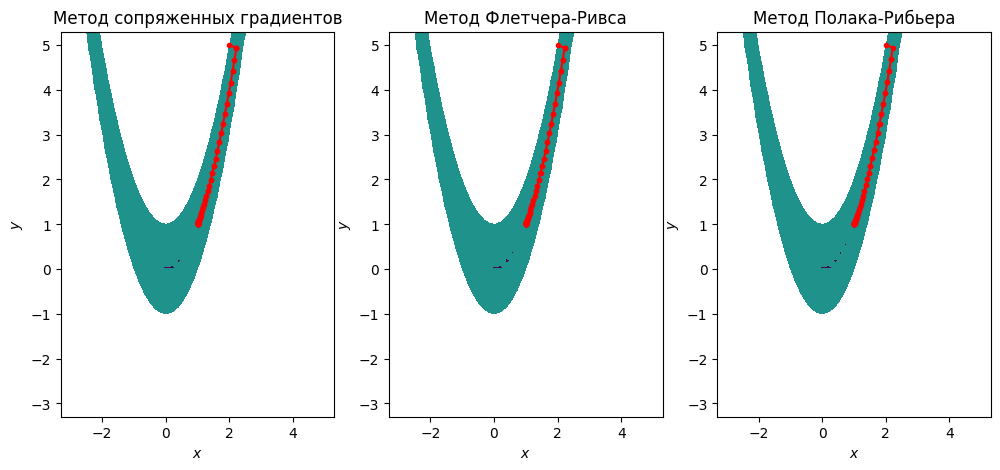

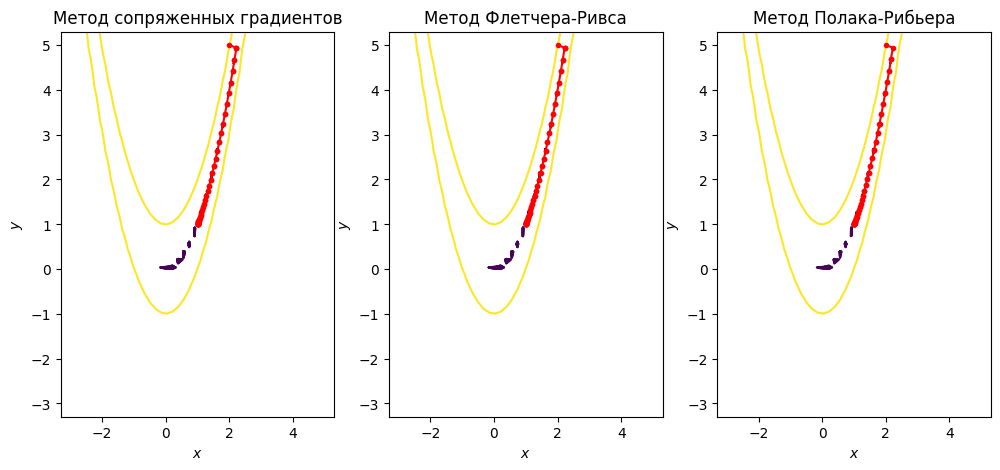

In [ ]:
from ast import While
from operator import mod
import numpy as np
import sympy as sp
import math
import matplotlib.pyplot as plt



# Параметры методов:
alpha = 133
eps = 0.000001
X0 = np.array([2, 5])

# функция Розенброка
f = lambda x, y: alpha * (x**2 - y)**2 + (x - 1)**2


# Вычисление градиента:
x_sym, y_sym = sp.Symbol('x'), sp.Symbol('y')
Grad_f = sp.tensor.array.derive_by_array(f(x_sym, y_sym), [x_sym, y_sym])
Grad_f = sp.lambdify((x_sym, y_sym), Grad_f, 'numpy')



#Метод золотого сечения
def golden_ratio(phi, n, b = 0.5, a = 0, e = eps):
    tau = (math.sqrt(5) + 1) / 2
    Ak, Bk = a, b
    lk = Bk - Ak
    Xk1 = Ak + ((Bk - Ak) - (Bk - Ak) / tau)
    Xk2 = Ak + (Bk - Ak) / tau
    y1, y2 = phi(Xk1), phi(Xk2)
    n += 2
    while lk >= e/1000:
        if y1 >= y2:
            Ak = Xk1
            Xk1 = Xk2
            Xk2 = Ak + Bk - Xk1
            y1 = y2
            y2 = phi(Xk2)
            n +=1
        else:
            Bk = Xk2
            Xk2 = Xk1
            Xk1 = Ak + Bk - Xk2
            y2 = y1
            y1 = phi(Xk1)
            n +=1
        lk = Bk - Ak
    return (Ak + Bk) / 2, n


#Метод сопряженных градиентов
def conjugate_directions(method):
    w = lambda X: -np.array(Grad_f(X[0], X[1]))
    fun = lambda X: f(X[0], X[1])
    X = X0
    n = 0
    phi = lambda kappa: fun(X + kappa * p1)
    kappa_list, X_p, Y_p = np.empty(0), np.empty(0), np.empty(0)
    X_p = np.append(X_p, X[0])
    Y_p = np.append(Y_p, X[1])
    kappa_list = np.append(kappa_list, 0.1)
    p1 = w1 = w(X)
    g = i = 1   
    if np.linalg.norm(w1) < eps:
         return X, X_p, Y_p, i, n, g, kappa_list
    
    while (True):
        
        kappa, n = golden_ratio(phi, n) #находим каппу
        kappa_list = np.append(kappa_list, kappa)

        Xk = X + kappa * p1 #следующая точка
        w2 = w(Xk)
        g += 1
        if np.linalg.norm(w2) < eps:
            break

          
        # выбираем способ
        if method == 2:
            gamma = ((np.linalg.norm(w2))**2)/np.dot(w1, p1) #метод сопряженных градиентов
        elif method == 3:
            gamma = ((np.linalg.norm(w2))**2)/((np.linalg.norm(w1))**2) #метод Флетчера-Ривса
        elif method == 4:
            gamma = np.dot((w2-w1), w2)/((np.linalg.norm(w1))**2) #метод Полака-Рибьера  

        if i % 2 == 0:
            gamma = 0     

        p2 = gamma * p1 + w2
        w1 = w2
        p1 = p2
        X = Xk
        X_p = np.append(X_p, X[0])
        Y_p = np.append(Y_p, X[1])
        i += 1

    return X, X_p, Y_p, i, n, g, kappa_list



#Не очень картинки
def DrawSurfContourAndWk(X2, X3, X4, X2_p, Y2_p, X3_p, Y3_p, X4_p, Y4_p):
    fig = plt.figure(figsize =(12,5))
    #fig.canvas.manager.full_screen_toggle()

    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)
    
    fig.canvas.manager.set_window_title('Методы сопряженного градиента')


    delta = max(abs(X2[0] - X0[0]), abs(X2[1] - X0[1])) + 0.3
    X, Y = np.meshgrid(np.linspace(X2[0] - delta, X2[0] + delta, 50),
    np.linspace(X2[1] - delta, X2[1] + delta, 50))
    # X, Y = np.meshgrid(X_p1, Y_p1)
    Z = f(X, Y)
    axes1.contour(X, Y, Z, levels = Val(X2_p, Y2_p))
    axes1.plot(X2_p, Y2_p, marker='o', markersize=3, color='red')
    axes1.set_xlabel('$x$')
    axes1.set_ylabel('$y$')
    axes1.set_title('Метод сопряженных градиентов')

   
    delta = max(abs(X3[0] - X0[0]), abs(X3[1] - X0[1])) + 0.3
    X, Y = np.meshgrid(np.linspace(X3[0] - delta, X3[0] + delta, 50),
    np.linspace(X3[1] - delta, X3[1] + delta, 50))
    # X, Y = np.meshgrid(X_p1, Y_p1)
    Z = f(X, Y)
    axes2.contour(X, Y, Z, levels = Val(X3_p, Y3_p))
    axes2.plot(X3_p, Y3_p, marker='o', markersize=3, color='red')
    axes2.set_xlabel('$x$')
    axes2.set_ylabel('$y$')
    axes2.set_title('Метод Флетчера-Ривса')



    delta = max(abs(X4[0] - X0[0]), abs(X4[1] - X0[1])) + 0.3
    X, Y = np.meshgrid(np.linspace(X4[0] - delta, X4[0] + delta, 50),
    np.linspace(X4[1] - delta, X4[1] + delta, 50))
    #X, Y = np.meshgrid(X_p2, Y_p2)
    Z = f(X, Y)
    axes3.contour(X, Y, Z, levels = Val(X4_p, Y4_p))
    axes3.plot(X4_p, Y4_p, marker='o', markersize=3, color='red')
    axes3.set_xlabel('$x$')
    axes3.set_ylabel('$y$')
    axes3.set_title('Метод Полака-Рибьера')


#3D и линии уровня двух графиков
def DrawSurfContour(X2, X3, X4, X2_p, Y2_p, X3_p, Y3_p, X4_p, Y4_p):
    fig = plt.figure(figsize =(12,5))
    # fig.canvas.manager.full_screen_toggle()

    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)
    
    fig.canvas.manager.set_window_title('Методы сопряженного градиента')


    delta = max(abs(X2[0] - X0[0]), abs(X2[1] - X0[1])) + 0.3
    X, Y = np.meshgrid(np.linspace(X2[0] - delta, X2[0] + delta, 50),
    np.linspace(X2[1] - delta, X2[1] + delta, 50))
    # X, Y = np.meshgrid(X_p1, Y_p1)
    Z = f(X, Y)
    axes1.contourf(X, Y, Z, levels = Val(X2_p, Y2_p))
    axes1.plot(X2_p, Y2_p, marker='o', markersize=3, color='red')
    axes1.set_xlabel('$x$')
    axes1.set_ylabel('$y$')
    axes1.set_title('Метод сопряженных градиентов')
    

   
    delta = max(abs(X3[0] - X0[0]), abs(X3[1] - X0[1])) + 0.3
    X, Y = np.meshgrid(np.linspace(X3[0] - delta, X3[0] + delta, 50),
    np.linspace(X3[1] - delta, X3[1] + delta, 50))
    # X, Y = np.meshgrid(X_p1, Y_p1)
    Z = f(X, Y)
    axes2.contourf(X, Y, Z, levels = Val(X3_p, Y3_p))
    axes2.plot(X3_p, Y3_p, marker='o', markersize=3, color='red')
    axes2.set_xlabel('$x$')
    axes2.set_ylabel('$y$')
    axes2.set_title('Метод Флетчера-Ривса')
    


    delta = max(abs(X4[0] - X0[0]), abs(X4[1] - X0[1])) + 0.3
    X, Y = np.meshgrid(np.linspace(X4[0] - delta, X4[0] + delta, 50),
    np.linspace(X4[1] - delta, X4[1] + delta, 50))
    #X, Y = np.meshgrid(X_p2, Y_p2)
    Z = f(X, Y)
    axes3.contourf(X, Y, Z, levels = Val(X4_p, Y4_p))
    axes3.plot(X4_p, Y4_p, marker='o', markersize=3, color='red')
    axes3.set_xlabel('$x$')
    axes3.set_ylabel('$y$')
    axes3.set_title('Метод Полака-Рибьера')
    


#3D и линии уровня одного графика
def Draw(X_, X_p, Y_p, k):

    delta = max(abs(X_[0] - X0[0]), abs(X_[1] - X0[1])) + 1
    X, Y = np.meshgrid(np.linspace(X_[0] - delta, X_[0] + delta,  100),
    np.linspace(X_[1] - delta, X_[1] + delta, 100))
    Z = f(X, Y)


    #Angles needed for quiver plot
    anglesx = X_p[1:] - X_p[:-1]
    anglesy = Y_p[1:] - Y_p[:-1]

    fig = plt.figure(figsize = (16,8))

    if k == 1:
        fig.canvas.manager.set_window_title('Метод сопряженных направлений')
    elif k == 2:
        fig.canvas.manager.set_window_title('Метод сопряженных градиентов')
    elif k == 3:
        fig.canvas.manager.set_window_title('Метод Флетчера-Ривса')
    elif k == 4:
        fig.canvas.manager.set_window_title('Метод Полака-Рибьера')


    


    #Surface plot
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.plot_surface(X, Y, Z, rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
    ax.plot(X_p, Y_p, f(X_p,Y_p), color = 'r', marker = '*', alpha = .4)

    #ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor = 'none')
    ax.scatter(X0[0], X0[1], f(X0[0], X0[1]), s=20, marker='*', c='red', label='X0 - начальное приближение')
    ax.scatter(X_[0], X_[1], f(X_[0], X_[1]), s=20, marker='*', c='black', label='X - точка минимума')
    ax.legend(shadow = True, fontsize = 8)
    ax.view_init(15, 60)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')
    ax.set_title('Поверхность данной функции')


   
    #Contour plot
    ax = fig.add_subplot(1, 2, 2)
    ax.contourf(X, Y, Z, levels = Val(X_p, Y_p), cmap = 'jet')
    
    # Plotting the iterations and intermediate values
    ax.scatter(X_p, Y_p, color = 'r', marker = '*')
    ax.quiver(X_p[:-1], Y_p[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .3)
    


# Таблица точек и значений
def DrawPoints(X_p, Y_p, kappa_):
    for x in range(len(X_p)):
        #print('X = [','%.3f' % X_p[x], ' ','%.3f' % Y_p[x],']','\tf = ','%.3f' % f(X_p[x],Y_p[x]),'\tkappa = ','%.3f' % kappa_[x])
        print('X = [', np.round(X_p[x],6), ' ',np.round(Y_p[x],6),']\t',np.round(f(X_p[x],Y_p[x]),6),'\tkappa = ',np.round(kappa_[x],6))

    print()

# Значения функции
def Val(X_p, Y_p):
    Value = []
    for i in range(len(X_p)):
        Value.insert(0, f(X_p[i],Y_p[i]))
    return Value


def DrawValue(X_p, Y_p):
    for x in Val(X_p,Y_p):
        print('Value = ', np.round(x,6))

    print()

##############################################################################################################################################################################
##############################################################################################################################################################################
##############################################################################################################################################################################


print(" " * 20,' Методы сопряженных градиентов')
print('Дано:')
print('Целевая функция:        f(x, y) = ', f(x_sym, y_sym))
print('Начальное приближение:  X = ', X0)
print('Точность вычисления:    Eps = ', eps)


var = 0

if var == 2:
    X2, X2_p, Y2_p, i2, n2, g2, kappa_2 = conjugate_directions(2)
    print('X = ', X2)
    print('f = ', f(X2[0],X2[1]))
    print('i = ', i2)
    print('n = ', n2)
    print('g = ', g2)
    #DrawPoints(X2_p, Y2_p, kappa_2) # таблица точек и значений 3
    #DrawValue(X2_p, Y2_p)
    Draw(X2, X2_p, Y2_p, 2)
elif var == 3:
    X3, X3_p, Y3_p, i3, n3, g3, kappa_3 = conjugate_directions(3)
    print('X = ', X3)
    print('f = ', f(X3[0],X3[1]))
    print('i = ', i3)
    print('n = ', n3)
    print('g = ', g3)
    #DrawPoints(X3_p, Y3_p, kappa_3) # таблица точек и значений 3
    #DrawValue(X3_p, Y3_p)
    Draw(X3, X3_p, Y3_p, 3)
elif var == 4:
    X4, X4_p, Y4_p, i4, n4, g4, kappa_4 = conjugate_directions(4)
    print('X = ', np.round(X4, 6))
    print('f = ', np.round(f(X4[0], X4[1]),6))
    print('i = ', i4)
    print('n = ', n4)
    print('g = ', g4)
    #DrawPoints(X4_p, Y4_p, kappa_4) # таблица точек и значений 4
    #DrawValue(X4_p, Y4_p)
    Draw(X4, X4_p, Y4_p, 4)
elif var == 0:
    X2, X2_p, Y2_p, i2, n2, g2, kappa_2 = conjugate_directions(2)
    X3, X3_p, Y3_p, i3, n3, g3, kappa_3 = conjugate_directions(3)
    X4, X4_p, Y4_p, i4, n4, g4, kappa_4 = conjugate_directions(4)
    print()
    print('**********************************************************************************************************************************************************************')
    print('Методы\t\t\t', '    МСГ\t\t\t', '    Флетчера-Ривса\t\t\t', '    Полака-Рибьера')
    print('Xmin  \t\t',  X2,'\t\t', X3,'\t', X4)
    print('f(Xmin)\t\t', f(X2[0], X2[1]),'\t\t\t', f(X3[0],X3[1]),'\t\t\t', f(X4[0], X4[1]))
    print('i\t\t\t', i2,'\t\t\t\t\t',i3,'\t\t\t\t\t',i4)
    print('n\t\t\t', n2,'\t\t\t\t\t',n3,'\t\t\t\t\t',n4)
    print('g\t\t\t', g2,'\t\t\t\t\t',g3,'\t\t\t\t\t',g4)
    print('**********************************************************************************************************************************************************************')
    DrawSurfContour(X2, X3, X4, X2_p, Y2_p, X3_p, Y3_p, X4_p, Y4_p)
    DrawSurfContourAndWk(X2, X3, X4, X2_p, Y2_p, X3_p, Y3_p, X4_p, Y4_p)
elif var == 234:
    X2, X2_p, Y2_p, i2, n2, g2, kappa_2 = conjugate_directions(2)
    X3, X3_p, Y3_p, i3, n3, g3, kappa_3 = conjugate_directions(3)
    X4, X4_p, Y4_p, i4, n4, g4, kappa_4 = conjugate_directions(4)
    print()
    print('**********************************************************************************************************************************************************************')
    print('Методы\t\t\t', '    МСГ\t\t\t', '    Флетчера-Ривса\t\t\t', '    Полака-Рибьера')
    print('Xmin  \t\t',  X2,'\t\t', X3,'\t', X4)
    print('f(Xmin)\t\t', f(X2[0], X2[1]),'\t\t\t', f(X3[0],X3[1]),'\t\t\t', f(X4[0], X4[1]))
    print('i\t\t\t', i2,'\t\t\t\t\t',i3,'\t\t\t\t\t',i4)
    print('n\t\t\t', n2,'\t\t\t\t\t',n3,'\t\t\t\t\t',n4)
    print('g\t\t\t', g2,'\t\t\t\t\t',g3,'\t\t\t\t\t',g4)
    print('**********************************************************************************************************************************************************************')
    DrawPoints(X2_p, Y2_p, kappa_2) # таблица точек и значений 3
    Draw(X2, X2_p, Y2_p, 2)
    DrawPoints(X3_p, Y3_p, kappa_3) # таблица точек и значений
    Draw(X3, X3_p, Y3_p, 3)
    DrawPoints(X4_p, Y4_p, kappa_4) # таблица точек и значений
    Draw(X4, X4_p, Y4_p, 4)






plt.show()





                      Методы сопряженных градиентов
Дано:
Целевая функция:        f(x, y) =  (x - 1)**2 + 30*(x**2 - y)**2
Начальное приближение:  X =  [ -2 -10]
Точность вычисления:    Eps =  1e-06

**********************************************************************************************************************************************************************
Методы			     МСГ			     Флетчера-Ривса			     Полака-Рибьера
Xmin  		 [0.99999911 0.99999821] 		 [0.99999911 0.9999982 ] 	 [0.99999905 0.99999809]
f(Xmin)		 7.930178124093986e-13 			 8.009746612043447e-13 			 9.1075160157615e-13
i			 246 					 246 					 145
n			 10086 					 10086 					 5945
g			 247 					 247 					 146
**********************************************************************************************************************************************************************


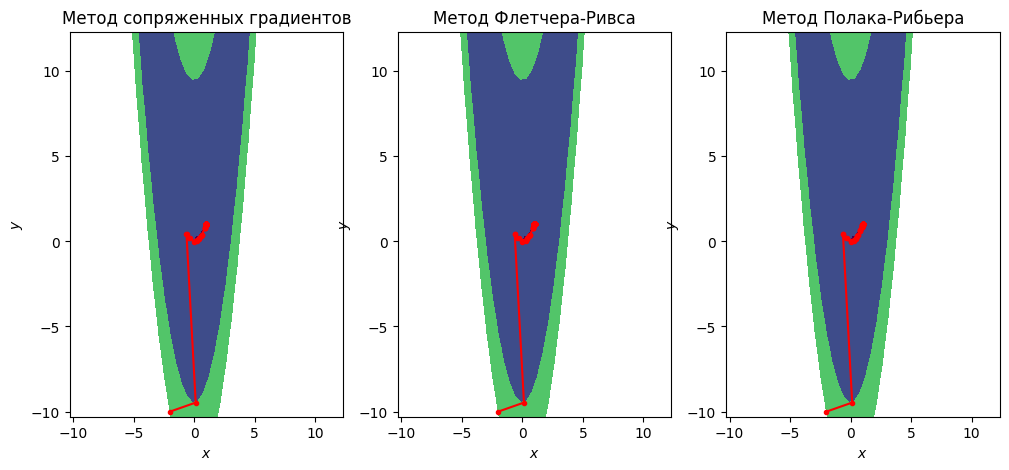

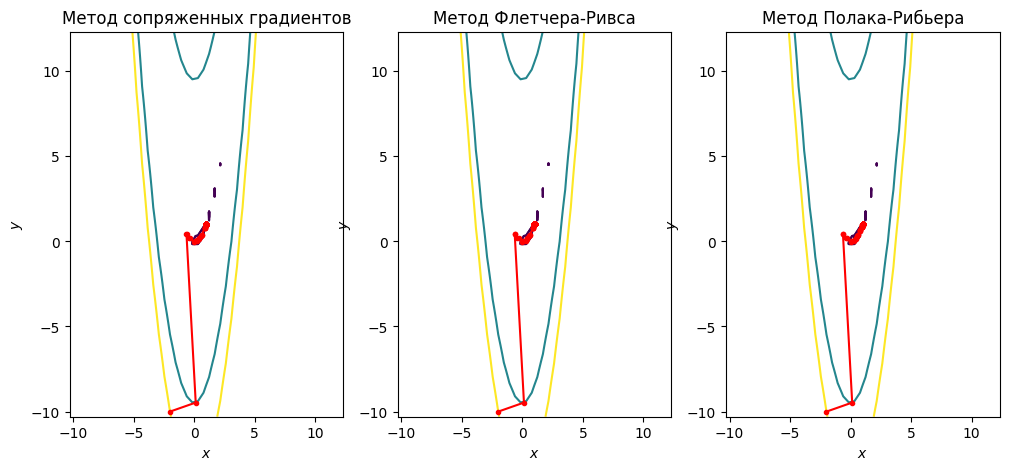

In [ ]:
from ast import While
from operator import mod
import numpy as np
import sympy as sp
import math
import matplotlib.pyplot as plt



# Параметры методов:
alpha = 30
eps = 0.000001
X0 = np.array([-2, -10])

# функция Розенброка
f = lambda x, y: alpha * (x**2 - y)**2 + (x - 1)**2


# Вычисление градиента:
x_sym, y_sym = sp.Symbol('x'), sp.Symbol('y')
Grad_f = sp.tensor.array.derive_by_array(f(x_sym, y_sym), [x_sym, y_sym])
Grad_f = sp.lambdify((x_sym, y_sym), Grad_f, 'numpy')



#Метод золотого сечения
def golden_ratio(phi, n, b = 0.1, a = 0, e = eps):
    tau = (math.sqrt(5) + 1) / 2
    Ak, Bk = a, b
    lk = Bk - Ak
    Xk1 = Ak + ((Bk - Ak) - (Bk - Ak) / tau)
    Xk2 = Ak + (Bk - Ak) / tau
    y1, y2 = phi(Xk1), phi(Xk2)
    n += 2
    while lk >= e/1000:
        if y1 >= y2:
            Ak = Xk1
            Xk1 = Xk2
            Xk2 = Ak + Bk - Xk1
            y1 = y2
            y2 = phi(Xk2)
            n +=1
        else:
            Bk = Xk2
            Xk2 = Xk1
            Xk1 = Ak + Bk - Xk2
            y2 = y1
            y1 = phi(Xk1)
            n +=1
        lk = Bk - Ak
    return (Ak + Bk) / 2, n


#Метод сопряженных градиентов
def conjugate_directions(method):
    w = lambda X: -np.array(Grad_f(X[0], X[1]))
    fun = lambda X: f(X[0], X[1])
    X = X0
    n = 0
    phi = lambda kappa: fun(X + kappa * p1)
    kappa_list, X_p, Y_p = np.empty(0), np.empty(0), np.empty(0)
    X_p = np.append(X_p, X[0])
    Y_p = np.append(Y_p, X[1])
    kappa_list = np.append(kappa_list, 0.1)
    p1 = w1 = w(X)
    g = i = 1   
    if np.linalg.norm(w1) < eps:
         return X, X_p, Y_p, i, n, g, kappa_list
    
    while (True):
        
        kappa, n = golden_ratio(phi, n) #находим каппу
        kappa_list = np.append(kappa_list, kappa)

        Xk = X + kappa * p1 #следующая точка
        w2 = w(Xk)
        g += 1
        if np.linalg.norm(w2) < eps:
            break

          
        # выбираем способ
        if method == 2:
            gamma = ((np.linalg.norm(w2))**2)/np.dot(w1, p1) #метод сопряженных градиентов
        elif method == 3:
            gamma = ((np.linalg.norm(w2))**2)/((np.linalg.norm(w1))**2) #метод Флетчера-Ривса
        elif method == 4:
            gamma = np.dot((w2-w1), w2)/((np.linalg.norm(w1))**2) #метод Полака-Рибьера  

        if i % 2 == 0:
            gamma = 0     

        p2 = gamma * p1 + w2
        w1 = w2
        p1 = p2
        X = Xk
        X_p = np.append(X_p, X[0])
        Y_p = np.append(Y_p, X[1])
        i += 1

    return X, X_p, Y_p, i, n, g, kappa_list



#Не очень картинки
def DrawSurfContourAndWk(X2, X3, X4, X2_p, Y2_p, X3_p, Y3_p, X4_p, Y4_p):
    fig = plt.figure(figsize =(12,5))
    #fig.canvas.manager.full_screen_toggle()

    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)
    
    fig.canvas.manager.set_window_title('Методы сопряженного градиента')


    delta = max(abs(X2[0] - X0[0]), abs(X2[1] - X0[1])) + 0.3
    X, Y = np.meshgrid(np.linspace(X2[0] - delta, X2[0] + delta, 50),
    np.linspace(X2[1] - delta, X2[1] + delta, 50))
    # X, Y = np.meshgrid(X_p1, Y_p1)
    Z = f(X, Y)
    axes1.contour(X, Y, Z, levels = Val(X2_p, Y2_p))
    axes1.plot(X2_p, Y2_p, marker='o', markersize=3, color='red')
    axes1.set_xlabel('$x$')
    axes1.set_ylabel('$y$')
    axes1.set_title('Метод сопряженных градиентов')

   
    delta = max(abs(X3[0] - X0[0]), abs(X3[1] - X0[1])) + 0.3
    X, Y = np.meshgrid(np.linspace(X3[0] - delta, X3[0] + delta, 50),
    np.linspace(X3[1] - delta, X3[1] + delta, 50))
    # X, Y = np.meshgrid(X_p1, Y_p1)
    Z = f(X, Y)
    axes2.contour(X, Y, Z, levels = Val(X3_p, Y3_p))
    axes2.plot(X3_p, Y3_p, marker='o', markersize=3, color='red')
    axes2.set_xlabel('$x$')
    axes2.set_ylabel('$y$')
    axes2.set_title('Метод Флетчера-Ривса')



    delta = max(abs(X4[0] - X0[0]), abs(X4[1] - X0[1])) + 0.3
    X, Y = np.meshgrid(np.linspace(X4[0] - delta, X4[0] + delta, 50),
    np.linspace(X4[1] - delta, X4[1] + delta, 50))
    #X, Y = np.meshgrid(X_p2, Y_p2)
    Z = f(X, Y)
    axes3.contour(X, Y, Z, levels = Val(X4_p, Y4_p))
    axes3.plot(X4_p, Y4_p, marker='o', markersize=3, color='red')
    axes3.set_xlabel('$x$')
    axes3.set_ylabel('$y$')
    axes3.set_title('Метод Полака-Рибьера')


#3D и линии уровня двух графиков
def DrawSurfContour(X2, X3, X4, X2_p, Y2_p, X3_p, Y3_p, X4_p, Y4_p):
    fig = plt.figure(figsize =(12,5))
    # fig.canvas.manager.full_screen_toggle()

    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)
    
    fig.canvas.manager.set_window_title('Методы сопряженного градиента')


    delta = max(abs(X2[0] - X0[0]), abs(X2[1] - X0[1])) + 0.3
    X, Y = np.meshgrid(np.linspace(X2[0] - delta, X2[0] + delta, 50),
    np.linspace(X2[1] - delta, X2[1] + delta, 50))
    # X, Y = np.meshgrid(X_p1, Y_p1)
    Z = f(X, Y)
    axes1.contourf(X, Y, Z, levels = Val(X2_p, Y2_p))
    axes1.plot(X2_p, Y2_p, marker='o', markersize=3, color='red')
    axes1.set_xlabel('$x$')
    axes1.set_ylabel('$y$')
    axes1.set_title('Метод сопряженных градиентов')
    

   
    delta = max(abs(X3[0] - X0[0]), abs(X3[1] - X0[1])) + 0.3
    X, Y = np.meshgrid(np.linspace(X3[0] - delta, X3[0] + delta, 50),
    np.linspace(X3[1] - delta, X3[1] + delta, 50))
    # X, Y = np.meshgrid(X_p1, Y_p1)
    Z = f(X, Y)
    axes2.contourf(X, Y, Z, levels = Val(X3_p, Y3_p))
    axes2.plot(X3_p, Y3_p, marker='o', markersize=3, color='red')
    axes2.set_xlabel('$x$')
    axes2.set_ylabel('$y$')
    axes2.set_title('Метод Флетчера-Ривса')
    


    delta = max(abs(X4[0] - X0[0]), abs(X4[1] - X0[1])) + 0.3
    X, Y = np.meshgrid(np.linspace(X4[0] - delta, X4[0] + delta, 50),
    np.linspace(X4[1] - delta, X4[1] + delta, 50))
    #X, Y = np.meshgrid(X_p2, Y_p2)
    Z = f(X, Y)
    axes3.contourf(X, Y, Z, levels = Val(X4_p, Y4_p))
    axes3.plot(X4_p, Y4_p, marker='o', markersize=3, color='red')
    axes3.set_xlabel('$x$')
    axes3.set_ylabel('$y$')
    axes3.set_title('Метод Полака-Рибьера')
    


#3D и линии уровня одного графика
def Draw(X_, X_p, Y_p, k):

    delta = max(abs(X_[0] - X0[0]), abs(X_[1] - X0[1])) + 1
    X, Y = np.meshgrid(np.linspace(X_[0] - delta, X_[0] + delta,  100),
    np.linspace(X_[1] - delta, X_[1] + delta, 100))
    Z = f(X, Y)


    #Angles needed for quiver plot
    anglesx = X_p[1:] - X_p[:-1]
    anglesy = Y_p[1:] - Y_p[:-1]

    fig = plt.figure(figsize = (16,8))

    if k == 1:
        fig.canvas.manager.set_window_title('Метод сопряженных направлений')
    elif k == 2:
        fig.canvas.manager.set_window_title('Метод сопряженных градиентов')
    elif k == 3:
        fig.canvas.manager.set_window_title('Метод Флетчера-Ривса')
    elif k == 4:
        fig.canvas.manager.set_window_title('Метод Полака-Рибьера')


    


    #Surface plot
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.plot_surface(X, Y, Z, rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
    ax.plot(X_p, Y_p, f(X_p,Y_p), color = 'r', marker = '*', alpha = .4)

    #ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor = 'none')
    ax.scatter(X0[0], X0[1], f(X0[0], X0[1]), s=20, marker='*', c='red', label='X0 - начальное приближение')
    ax.scatter(X_[0], X_[1], f(X_[0], X_[1]), s=20, marker='*', c='black', label='X - точка минимума')
    ax.legend(shadow = True, fontsize = 8)
    ax.view_init(15, 60)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')
    ax.set_title('Поверхность данной функции')


   
    #Contour plot
    ax = fig.add_subplot(1, 2, 2)
    ax.contourf(X, Y, Z, levels = Val(X_p, Y_p), cmap = 'jet')
    
    # Plotting the iterations and intermediate values
    ax.scatter(X_p, Y_p, color = 'r', marker = '*')
    ax.quiver(X_p[:-1], Y_p[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .3)
    


# Таблица точек и значений
def DrawPoints(X_p, Y_p, kappa_):
    for x in range(len(X_p)):
        #print('X = [','%.3f' % X_p[x], ' ','%.3f' % Y_p[x],']','\tf = ','%.3f' % f(X_p[x],Y_p[x]),'\tkappa = ','%.3f' % kappa_[x])
        print('X = [', np.round(X_p[x],6), ' ',np.round(Y_p[x],6),']\t',np.round(f(X_p[x],Y_p[x]),6),'\tkappa = ',np.round(kappa_[x],6))

    print()

# Значения функции
def Val(X_p, Y_p):
    Value = []
    for i in range(len(X_p)):
        Value.insert(0, f(X_p[i],Y_p[i]))
    return Value


def DrawValue(X_p, Y_p):
    for x in Val(X_p,Y_p):
        print('Value = ', np.round(x,6))

    print()

##############################################################################################################################################################################
##############################################################################################################################################################################
##############################################################################################################################################################################


print(" " * 20,' Методы сопряженных градиентов')
print('Дано:')
print('Целевая функция:        f(x, y) = ', f(x_sym, y_sym))
print('Начальное приближение:  X = ', X0)
print('Точность вычисления:    Eps = ', eps)


var = 0

if var == 2:
    X2, X2_p, Y2_p, i2, n2, g2, kappa_2 = conjugate_directions(2)
    print('X = ', X2)
    print('f = ', f(X2[0],X2[1]))
    print('i = ', i2)
    print('n = ', n2)
    print('g = ', g2)
    #DrawPoints(X2_p, Y2_p, kappa_2) # таблица точек и значений 3
    #DrawValue(X2_p, Y2_p)
    Draw(X2, X2_p, Y2_p, 2)
elif var == 3:
    X3, X3_p, Y3_p, i3, n3, g3, kappa_3 = conjugate_directions(3)
    print('X = ', X3)
    print('f = ', f(X3[0],X3[1]))
    print('i = ', i3)
    print('n = ', n3)
    print('g = ', g3)
    #DrawPoints(X3_p, Y3_p, kappa_3) # таблица точек и значений 3
    #DrawValue(X3_p, Y3_p)
    Draw(X3, X3_p, Y3_p, 3)
elif var == 4:
    X4, X4_p, Y4_p, i4, n4, g4, kappa_4 = conjugate_directions(4)
    print('X = ', np.round(X4, 6))
    print('f = ', np.round(f(X4[0], X4[1]),6))
    print('i = ', i4)
    print('n = ', n4)
    print('g = ', g4)
    #DrawPoints(X4_p, Y4_p, kappa_4) # таблица точек и значений 4
    #DrawValue(X4_p, Y4_p)
    Draw(X4, X4_p, Y4_p, 4)
elif var == 0:
    X2, X2_p, Y2_p, i2, n2, g2, kappa_2 = conjugate_directions(2)
    X3, X3_p, Y3_p, i3, n3, g3, kappa_3 = conjugate_directions(3)
    X4, X4_p, Y4_p, i4, n4, g4, kappa_4 = conjugate_directions(4)
    print()
    print('**********************************************************************************************************************************************************************')
    print('Методы\t\t\t', '    МСГ\t\t\t', '    Флетчера-Ривса\t\t\t', '    Полака-Рибьера')
    print('Xmin  \t\t',  X2,'\t\t', X3,'\t', X4)
    print('f(Xmin)\t\t', f(X2[0], X2[1]),'\t\t\t', f(X3[0],X3[1]),'\t\t\t', f(X4[0], X4[1]))
    print('i\t\t\t', i2,'\t\t\t\t\t',i3,'\t\t\t\t\t',i4)
    print('n\t\t\t', n2,'\t\t\t\t\t',n3,'\t\t\t\t\t',n4)
    print('g\t\t\t', g2,'\t\t\t\t\t',g3,'\t\t\t\t\t',g4)
    print('**********************************************************************************************************************************************************************')
    DrawSurfContour(X2, X3, X4, X2_p, Y2_p, X3_p, Y3_p, X4_p, Y4_p)
    DrawSurfContourAndWk(X2, X3, X4, X2_p, Y2_p, X3_p, Y3_p, X4_p, Y4_p)
elif var == 234:
    X2, X2_p, Y2_p, i2, n2, g2, kappa_2 = conjugate_directions(2)
    X3, X3_p, Y3_p, i3, n3, g3, kappa_3 = conjugate_directions(3)
    X4, X4_p, Y4_p, i4, n4, g4, kappa_4 = conjugate_directions(4)
    print()
    print('**********************************************************************************************************************************************************************')
    print('Методы\t\t\t', '    МСГ\t\t\t', '    Флетчера-Ривса\t\t\t', '    Полака-Рибьера')
    print('Xmin  \t\t',  X2,'\t\t', X3,'\t', X4)
    print('f(Xmin)\t\t', f(X2[0], X2[1]),'\t\t\t', f(X3[0],X3[1]),'\t\t\t', f(X4[0], X4[1]))
    print('i\t\t\t', i2,'\t\t\t\t\t',i3,'\t\t\t\t\t',i4)
    print('n\t\t\t', n2,'\t\t\t\t\t',n3,'\t\t\t\t\t',n4)
    print('g\t\t\t', g2,'\t\t\t\t\t',g3,'\t\t\t\t\t',g4)
    print('**********************************************************************************************************************************************************************')
    DrawPoints(X2_p, Y2_p, kappa_2) # таблица точек и значений 3
    Draw(X2, X2_p, Y2_p, 2)
    DrawPoints(X3_p, Y3_p, kappa_3) # таблица точек и значений
    Draw(X3, X3_p, Y3_p, 3)
    DrawPoints(X4_p, Y4_p, kappa_4) # таблица точек и значений
    Draw(X4, X4_p, Y4_p, 4)






plt.show()



